In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_excel("hw_lesson03_dau.xlsx")
print(data.head())
print(data.info())

        date   DAU
0 2020-04-01  1134
1 2020-04-02  1427
2 2020-04-03  1741
3 2020-04-04  1921
4 2020-04-05  1942
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    91 non-null     datetime64[ns]
 1   DAU     91 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB
None


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date')

,DAU
date,
2020-04-01,1134
2020-04-02,1427
2020-04-03,1741
2020-04-04,1921
2020-04-05,1942
...,...
2020-06-26,2158
2020-06-27,2272
2020-06-28,2397


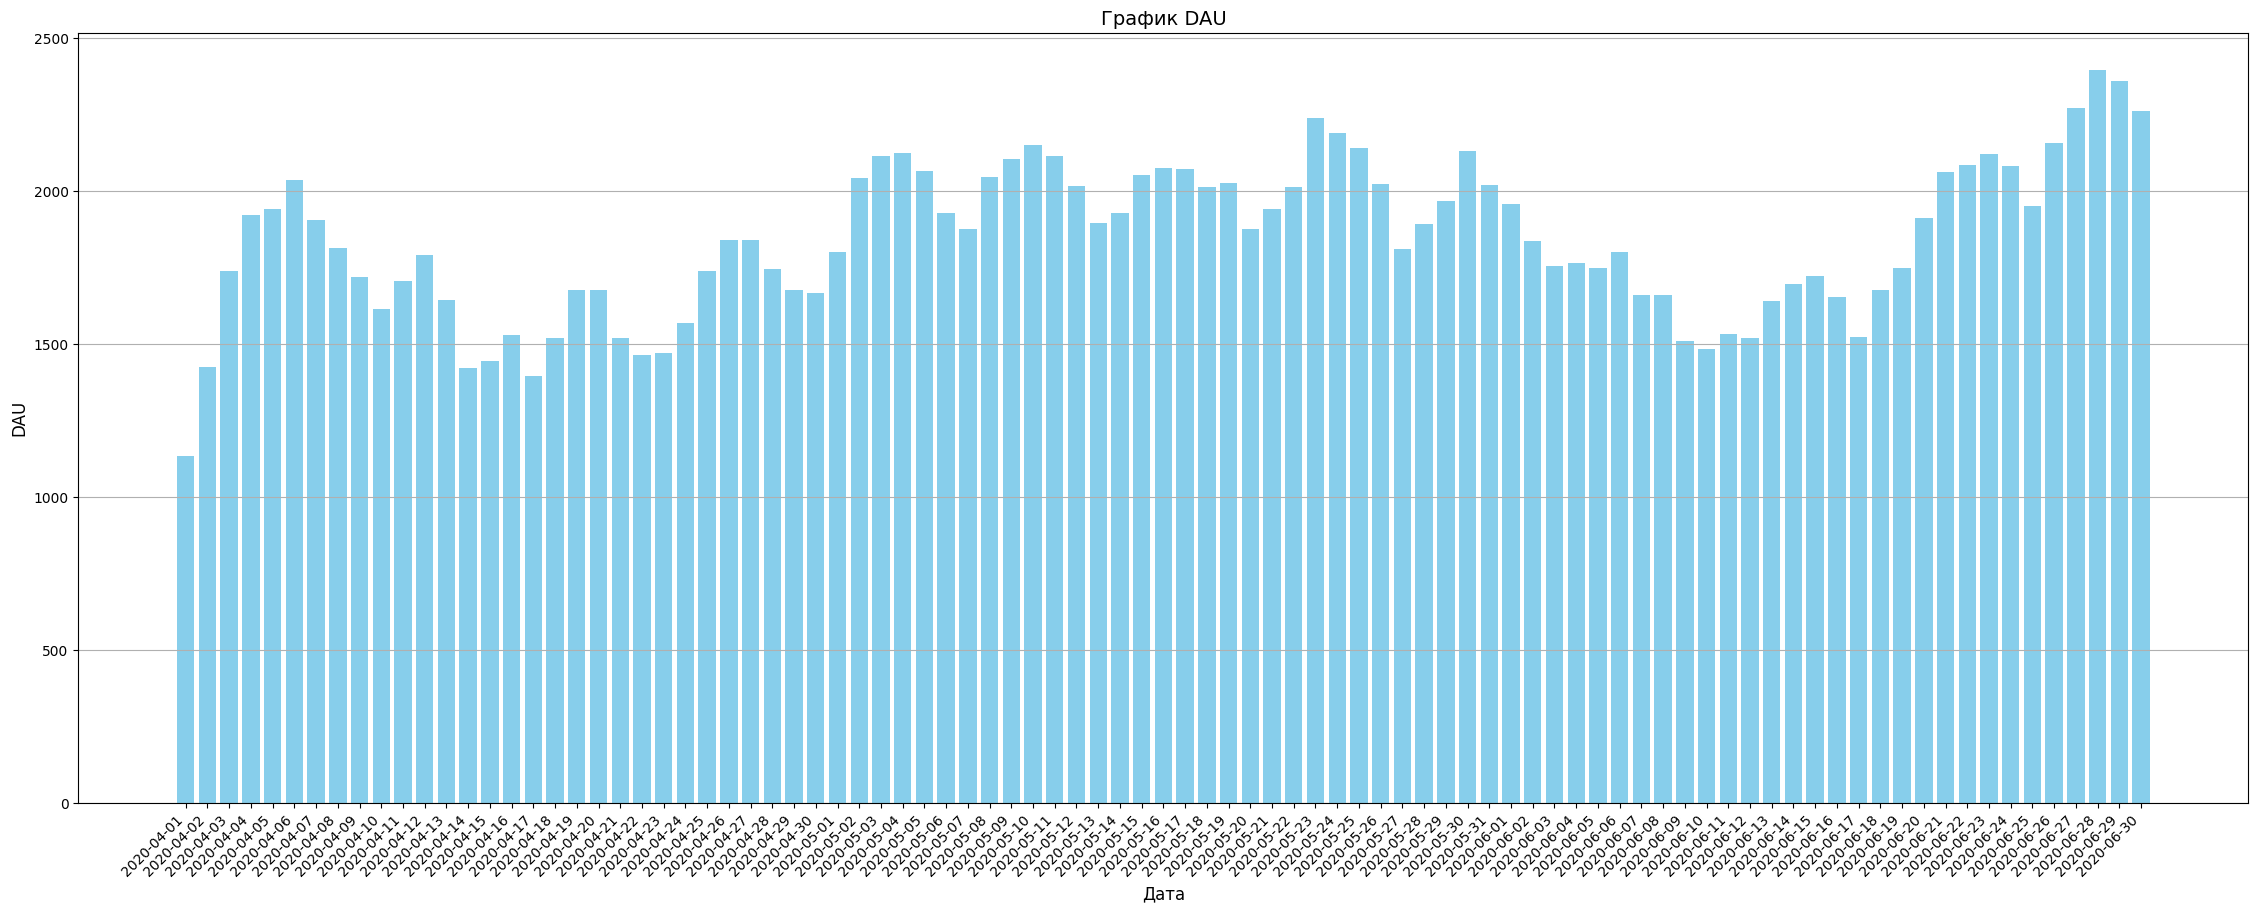

In [5]:
plt.figure(figsize = (28, 10))
plt.bar(data['date'], data['DAU'], color='skyblue')
plt.title('График DAU', fontsize=14)
plt.ylabel('DAU',  fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.xticks(data['date'].to_numpy(), rotation=45, horizontalalignment='right')
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

In [6]:
dataChannels = pd.read_excel('hw_lesson03_dau_channel.xlsx')
dataDevices = pd.read_excel('hw_lesson03_dau_device.xlsx')
dataRegions = pd.read_excel('hw_lesson03_dau_region.xlsx')

In [ ]:
def ChangeToDateTimeAndSetIndex(df):
    df1 = df['date'] = pd.to_datetime(df['date'])
    df.set_index('date')
    return df

In [31]:
dataChannels = ChangeToDateTimeAndSetIndex(dataChannels)
dataDevices = ChangeToDateTimeAndSetIndex(dataDevices)
dataRegions = ChangeToDateTimeAndSetIndex(dataRegions)
print(type(dataChannels['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


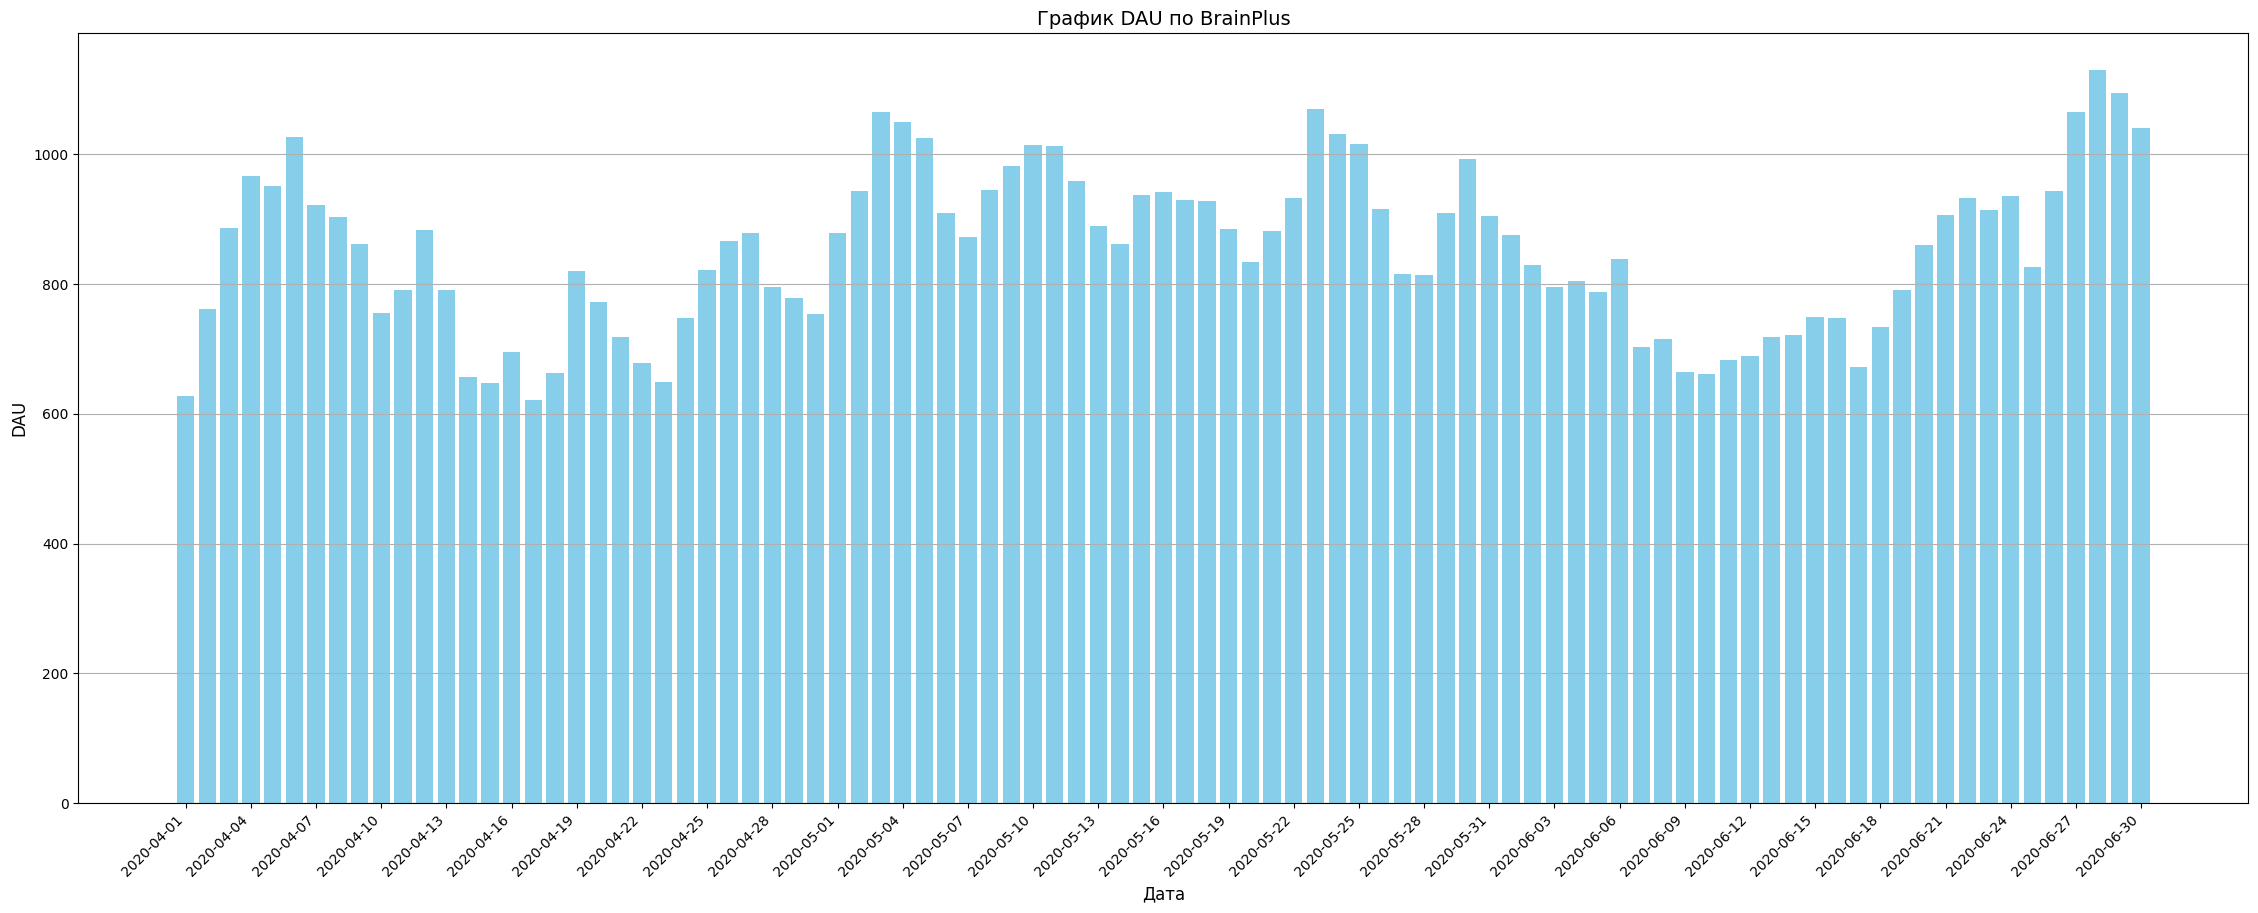

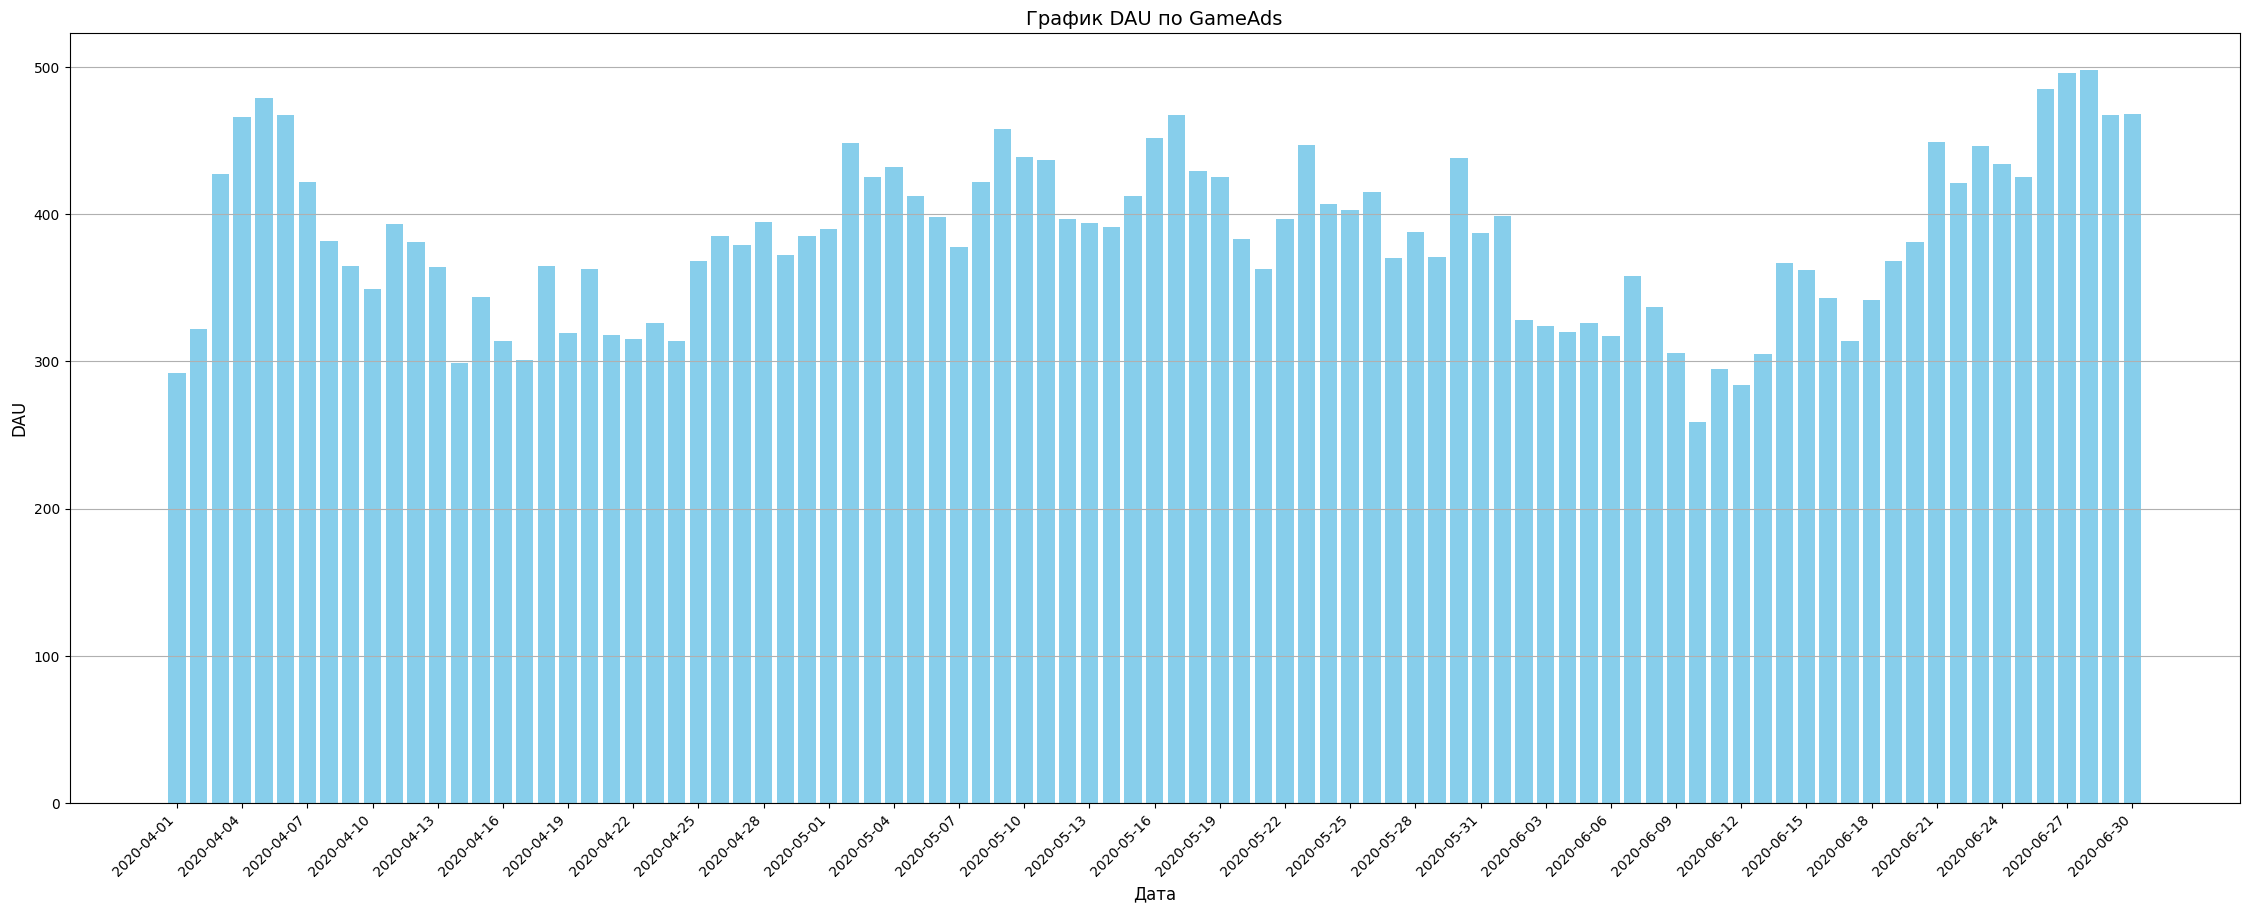

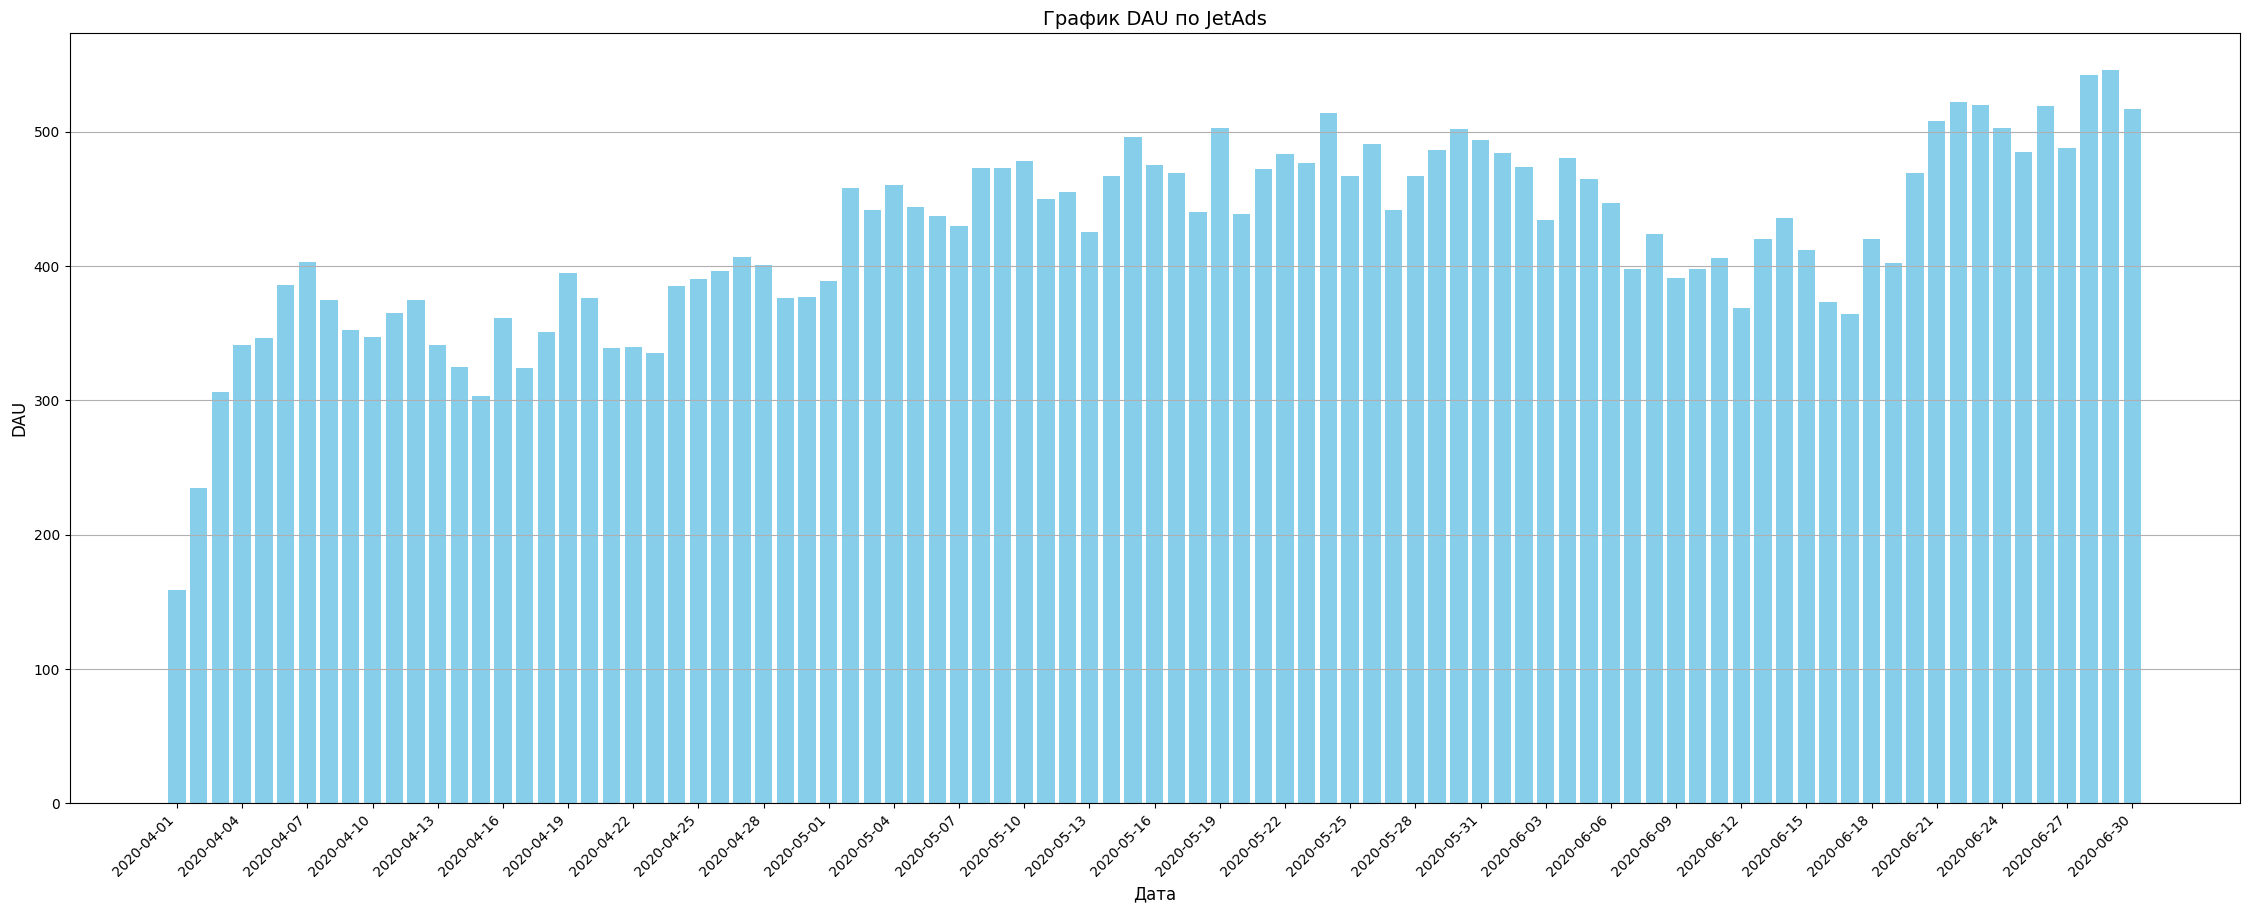

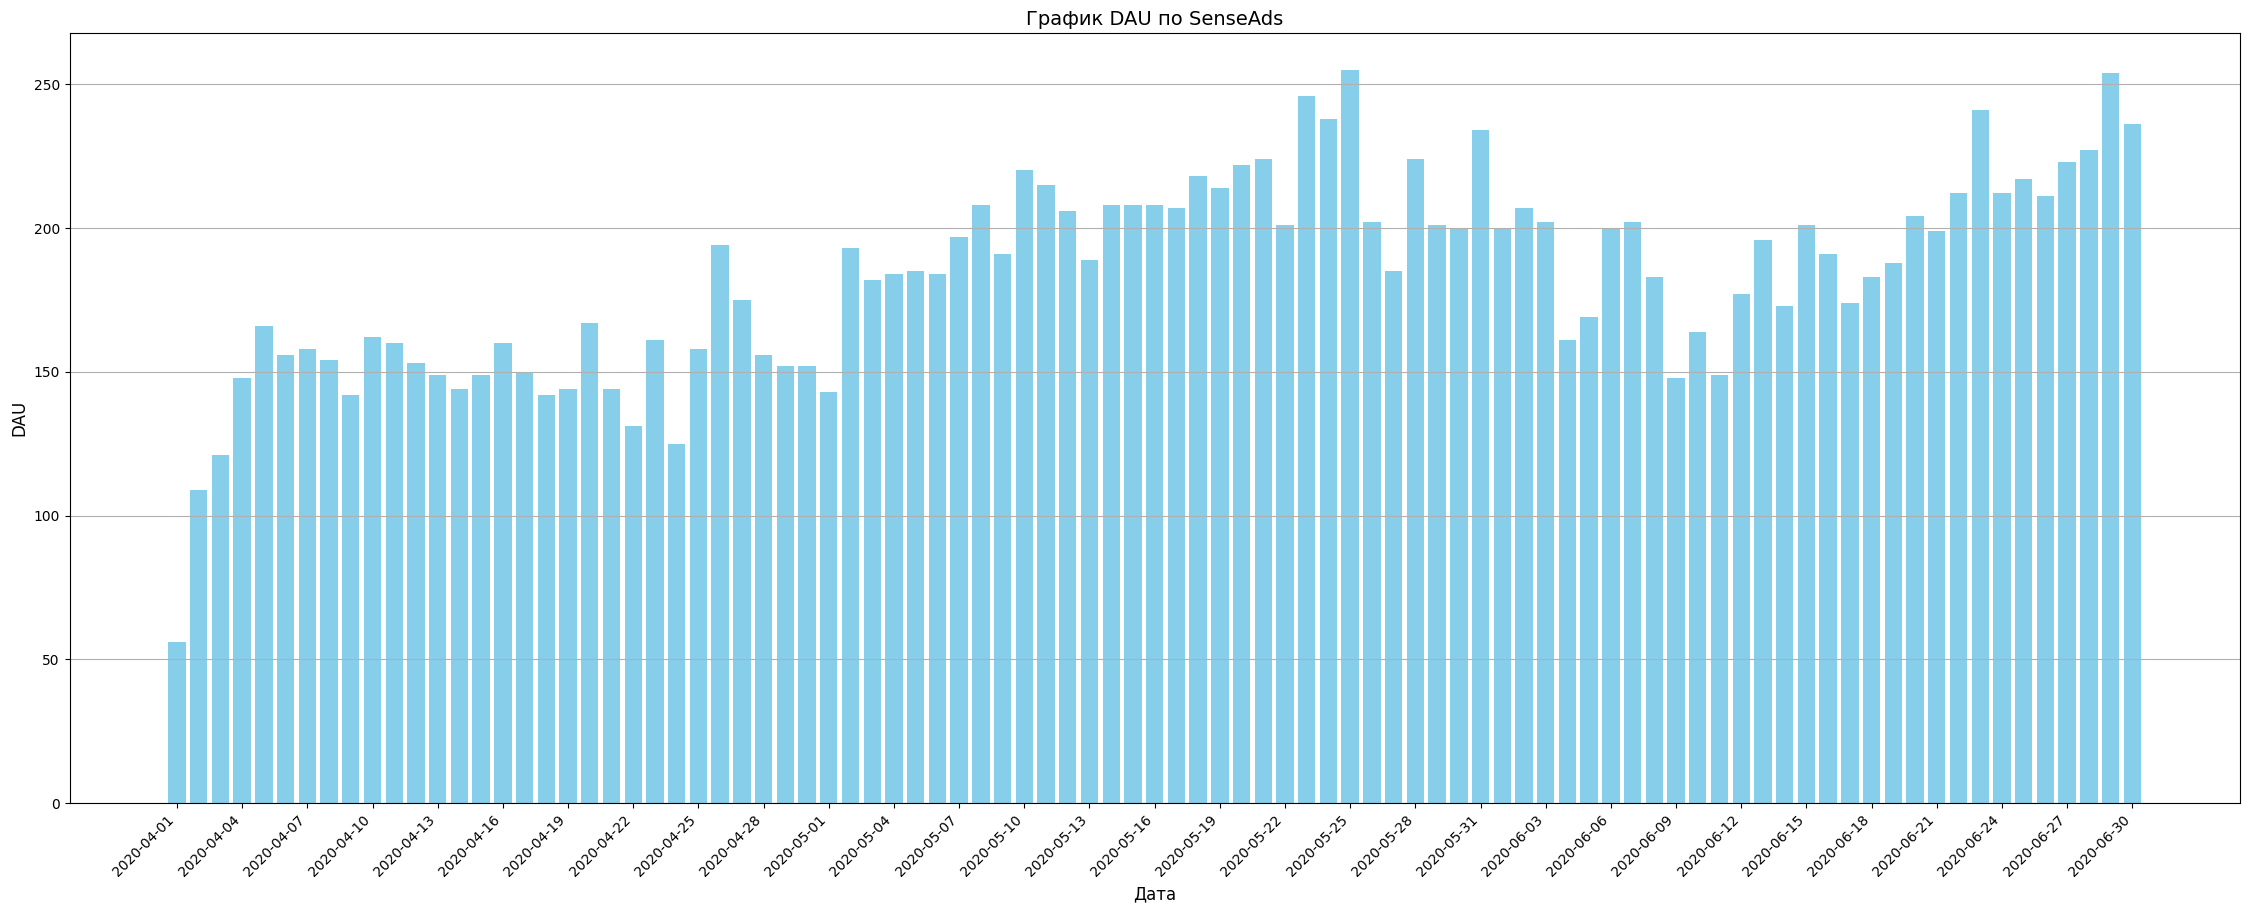

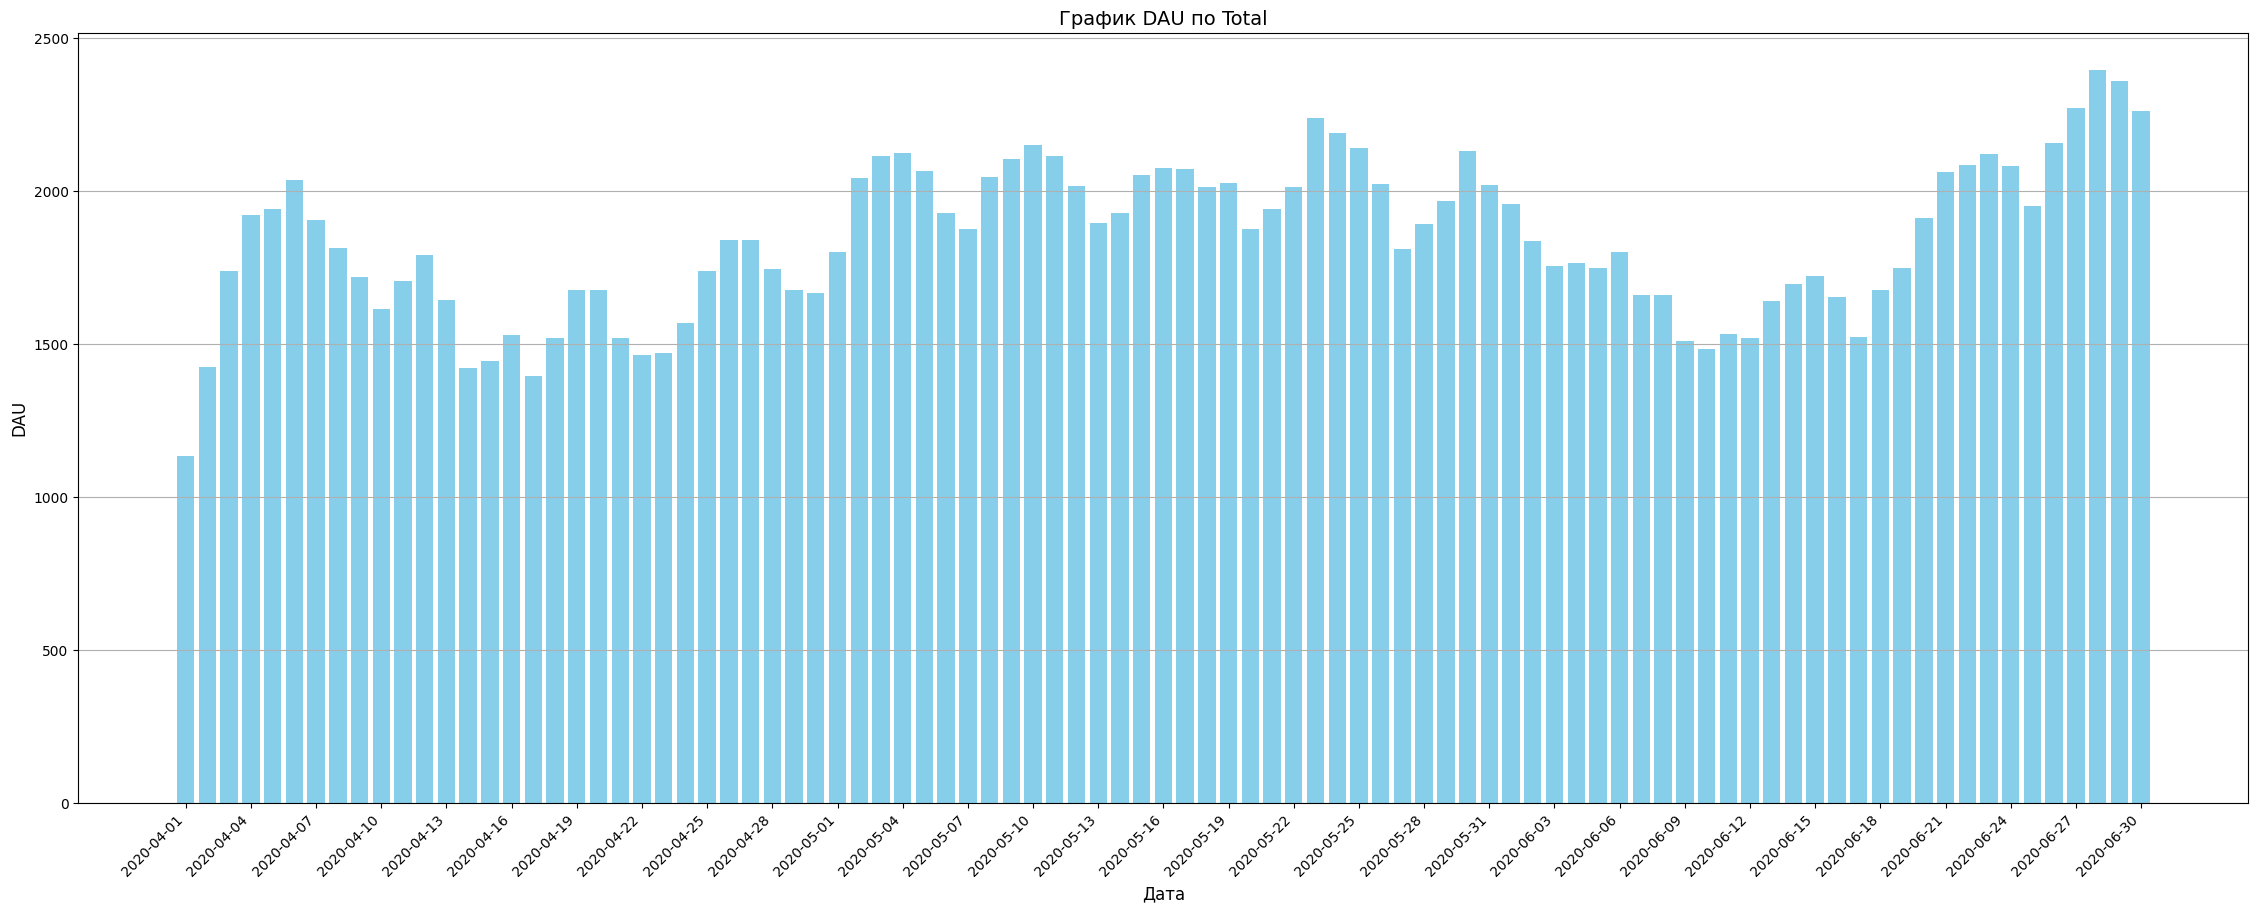

In [56]:
for i in dataChannels.columns[1:]:
    plt.figure(figsize=(28, 10))
    plt.bar(dataChannels['date'], dataChannels[i], color='skyblue')
    plt.title(f'График DAU по {i}', fontsize=14)
    plt.ylabel('DAU',  fontsize=12)
    plt.xlabel('Дата', fontsize=12)
    plt.xticks(dataChannels['date'].to_numpy()[::3], rotation=45, horizontalalignment='right')
    plt.grid(axis='y')


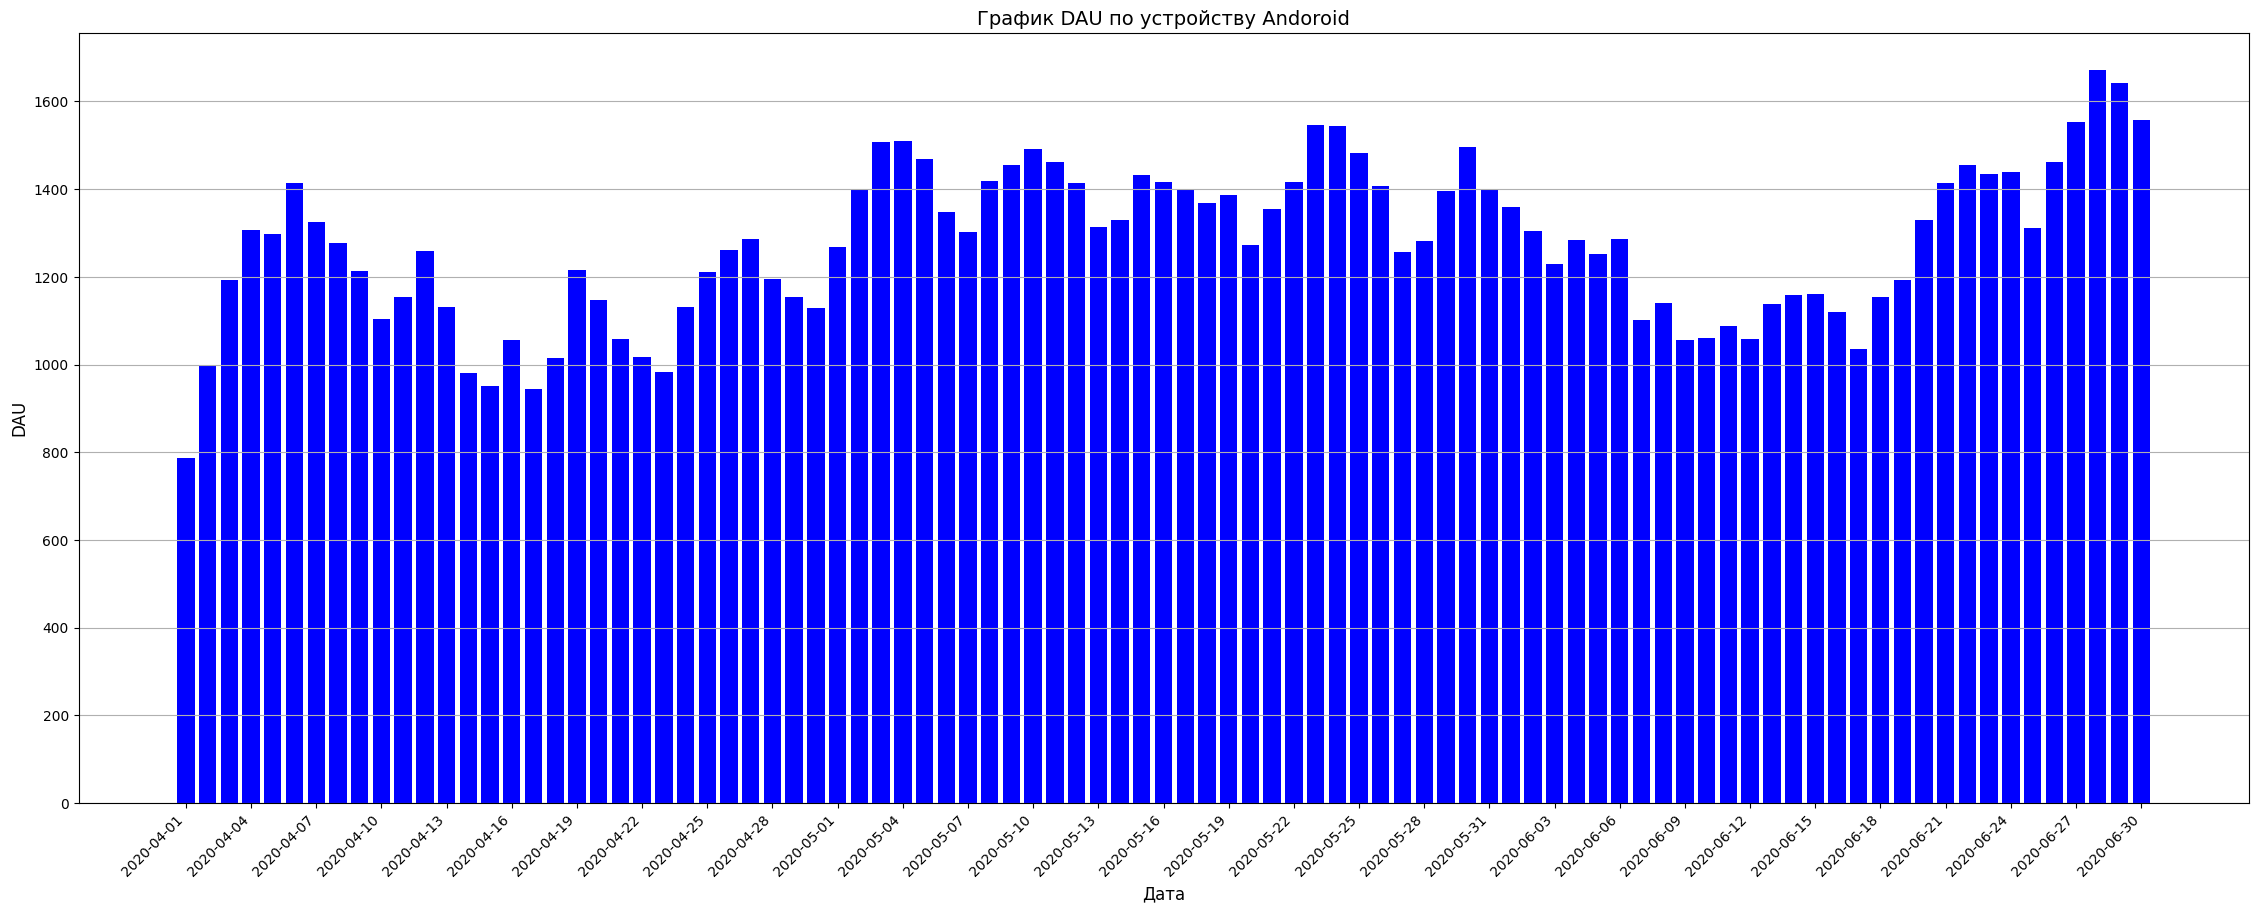

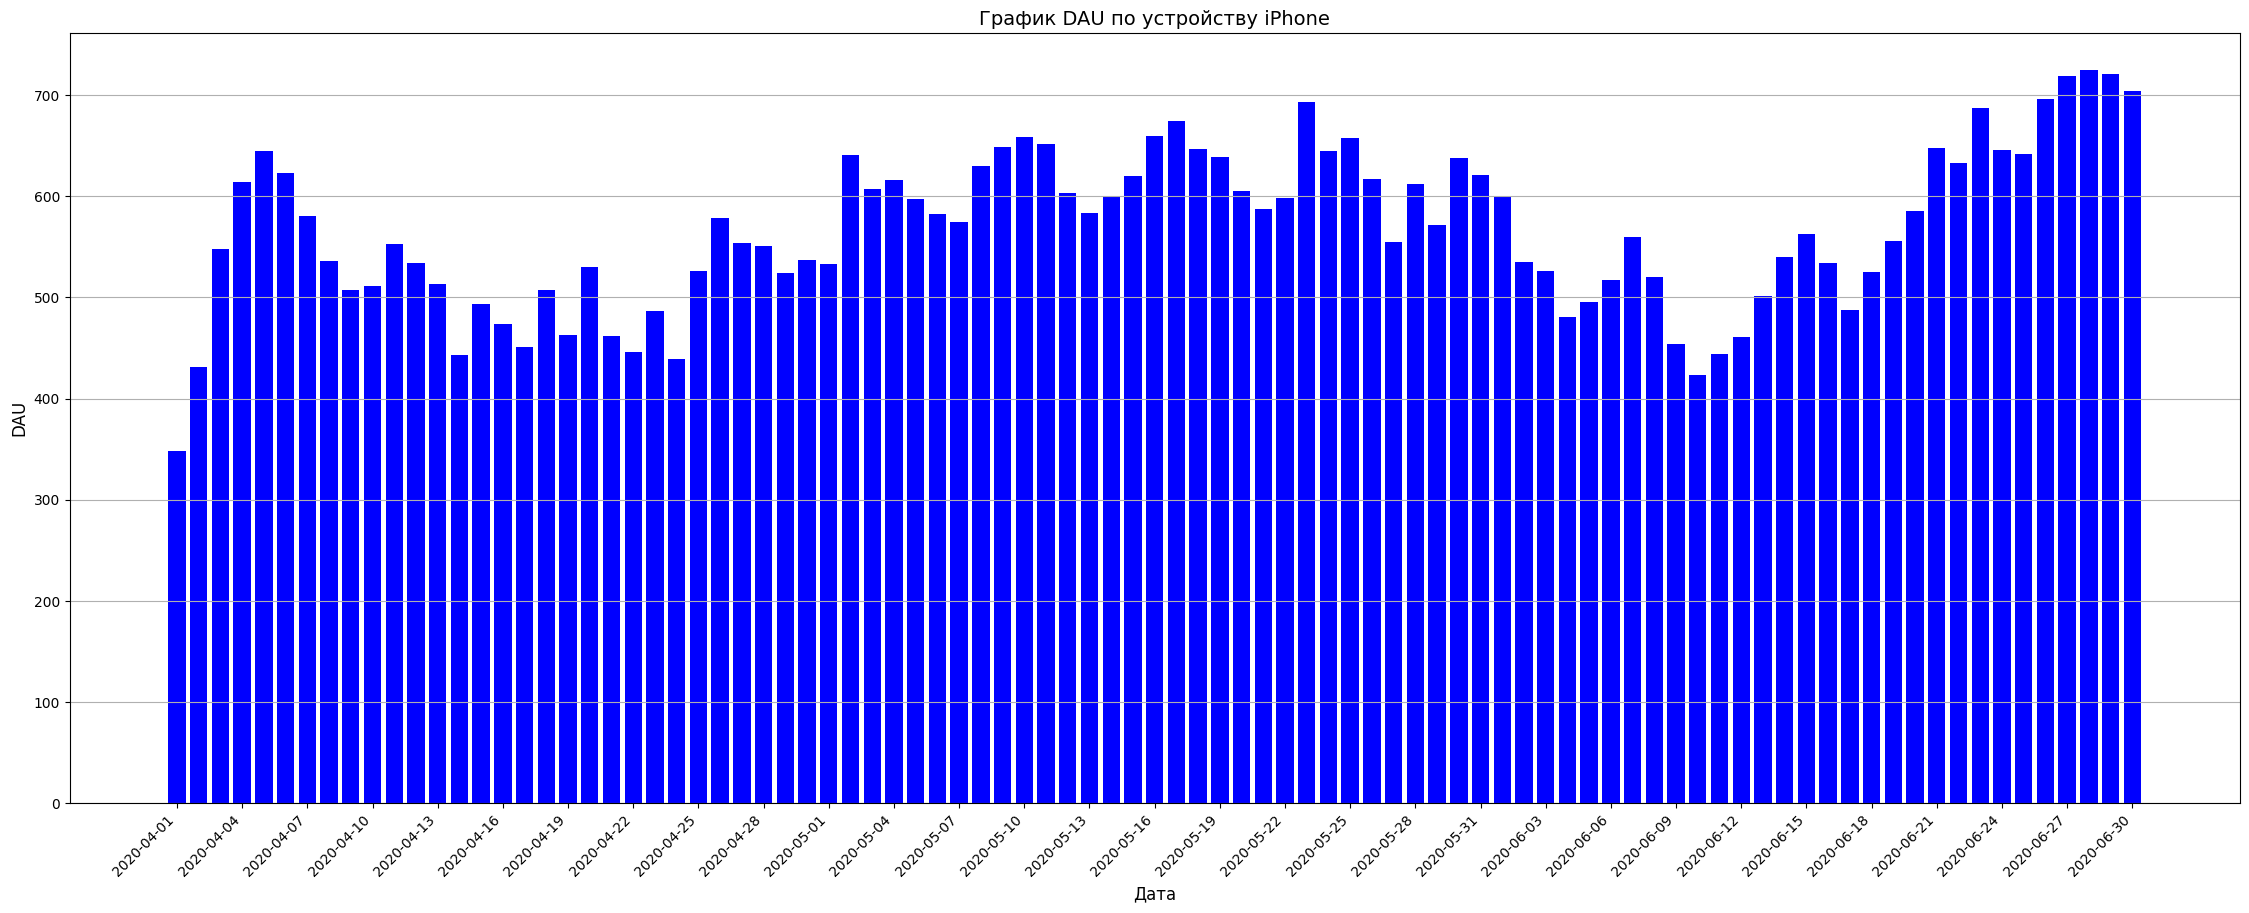

In [55]:
for i in dataDevices.columns[1:]:
    plt.figure(figsize=(28, 10))
    plt.bar(dataDevices['date'], dataDevices[i], color='blue')
    plt.title(f'График DAU по устройству {i}', fontsize=14)
    plt.ylabel('DAU',  fontsize=12)
    plt.xlabel('Дата', fontsize=12)
    plt.xticks(dataDevices['date'].to_numpy()[::3], rotation=45, horizontalalignment='right')
    plt.grid(axis='y')

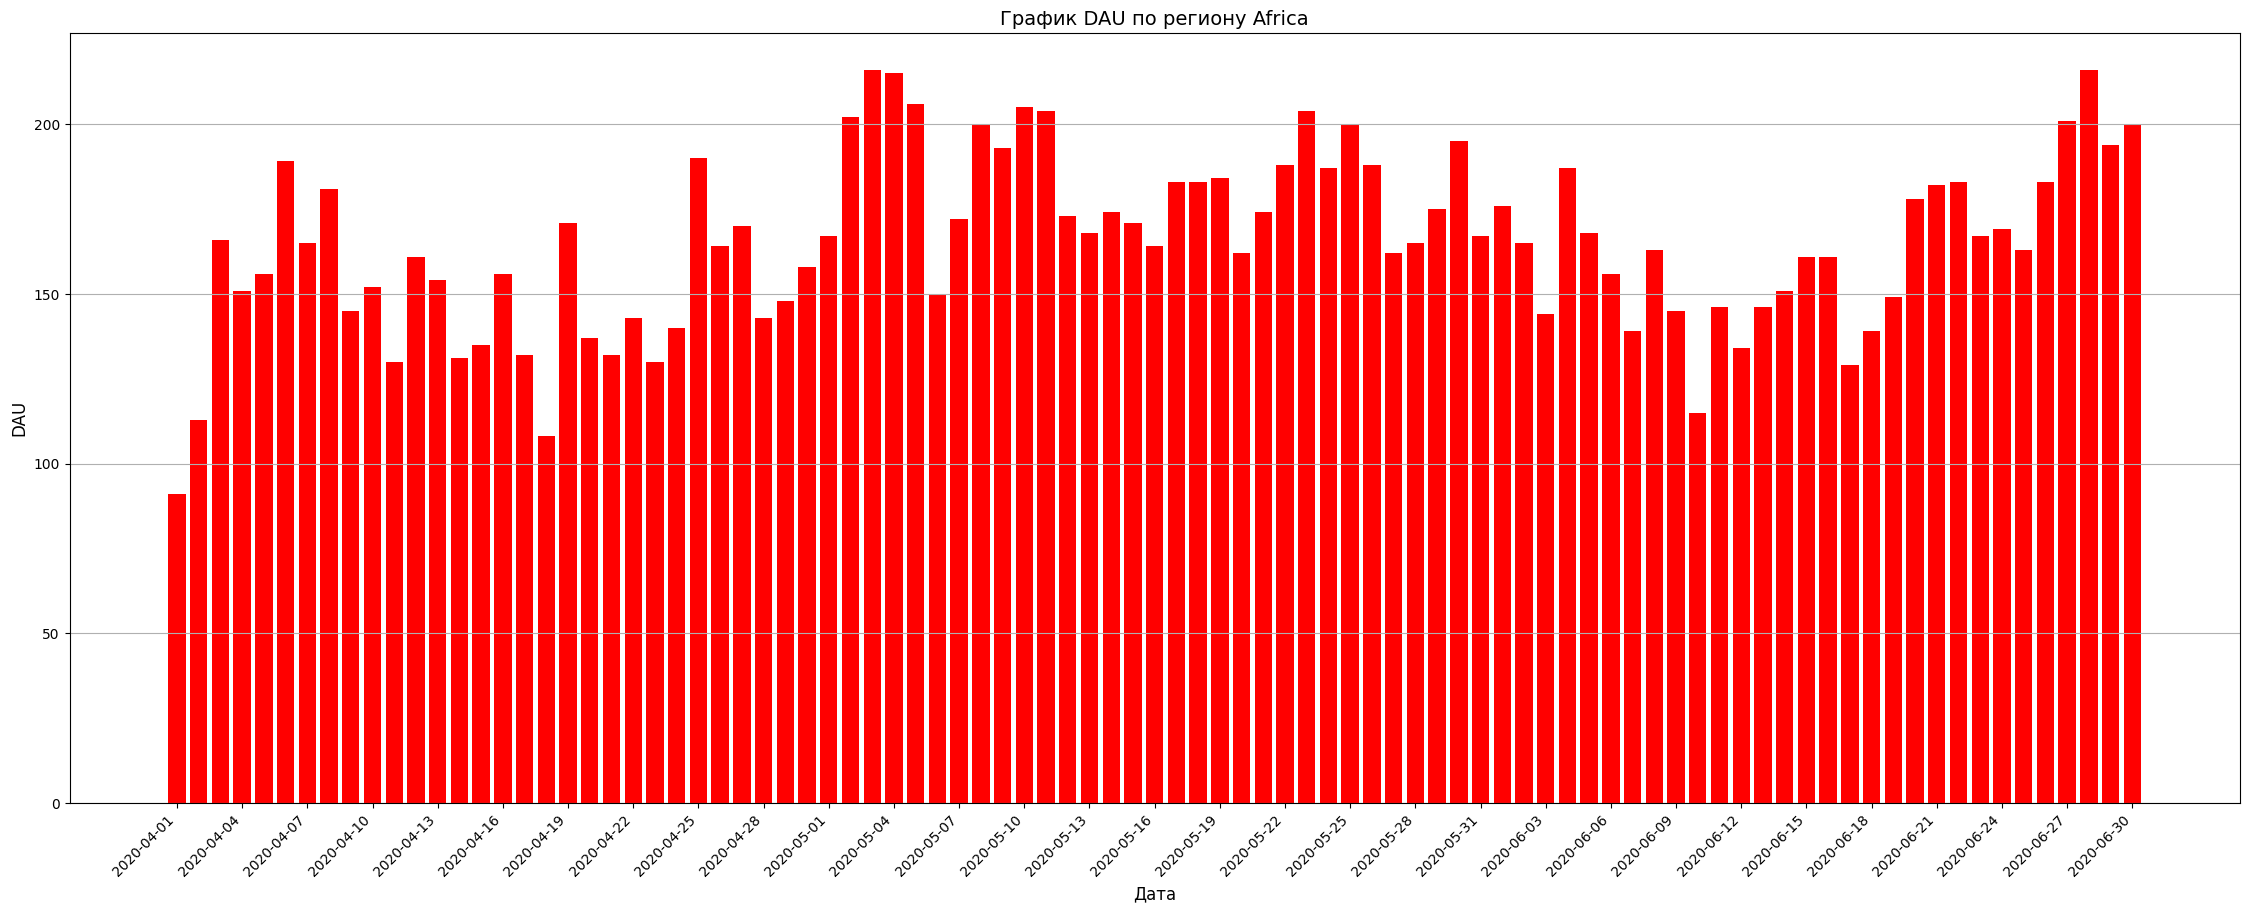

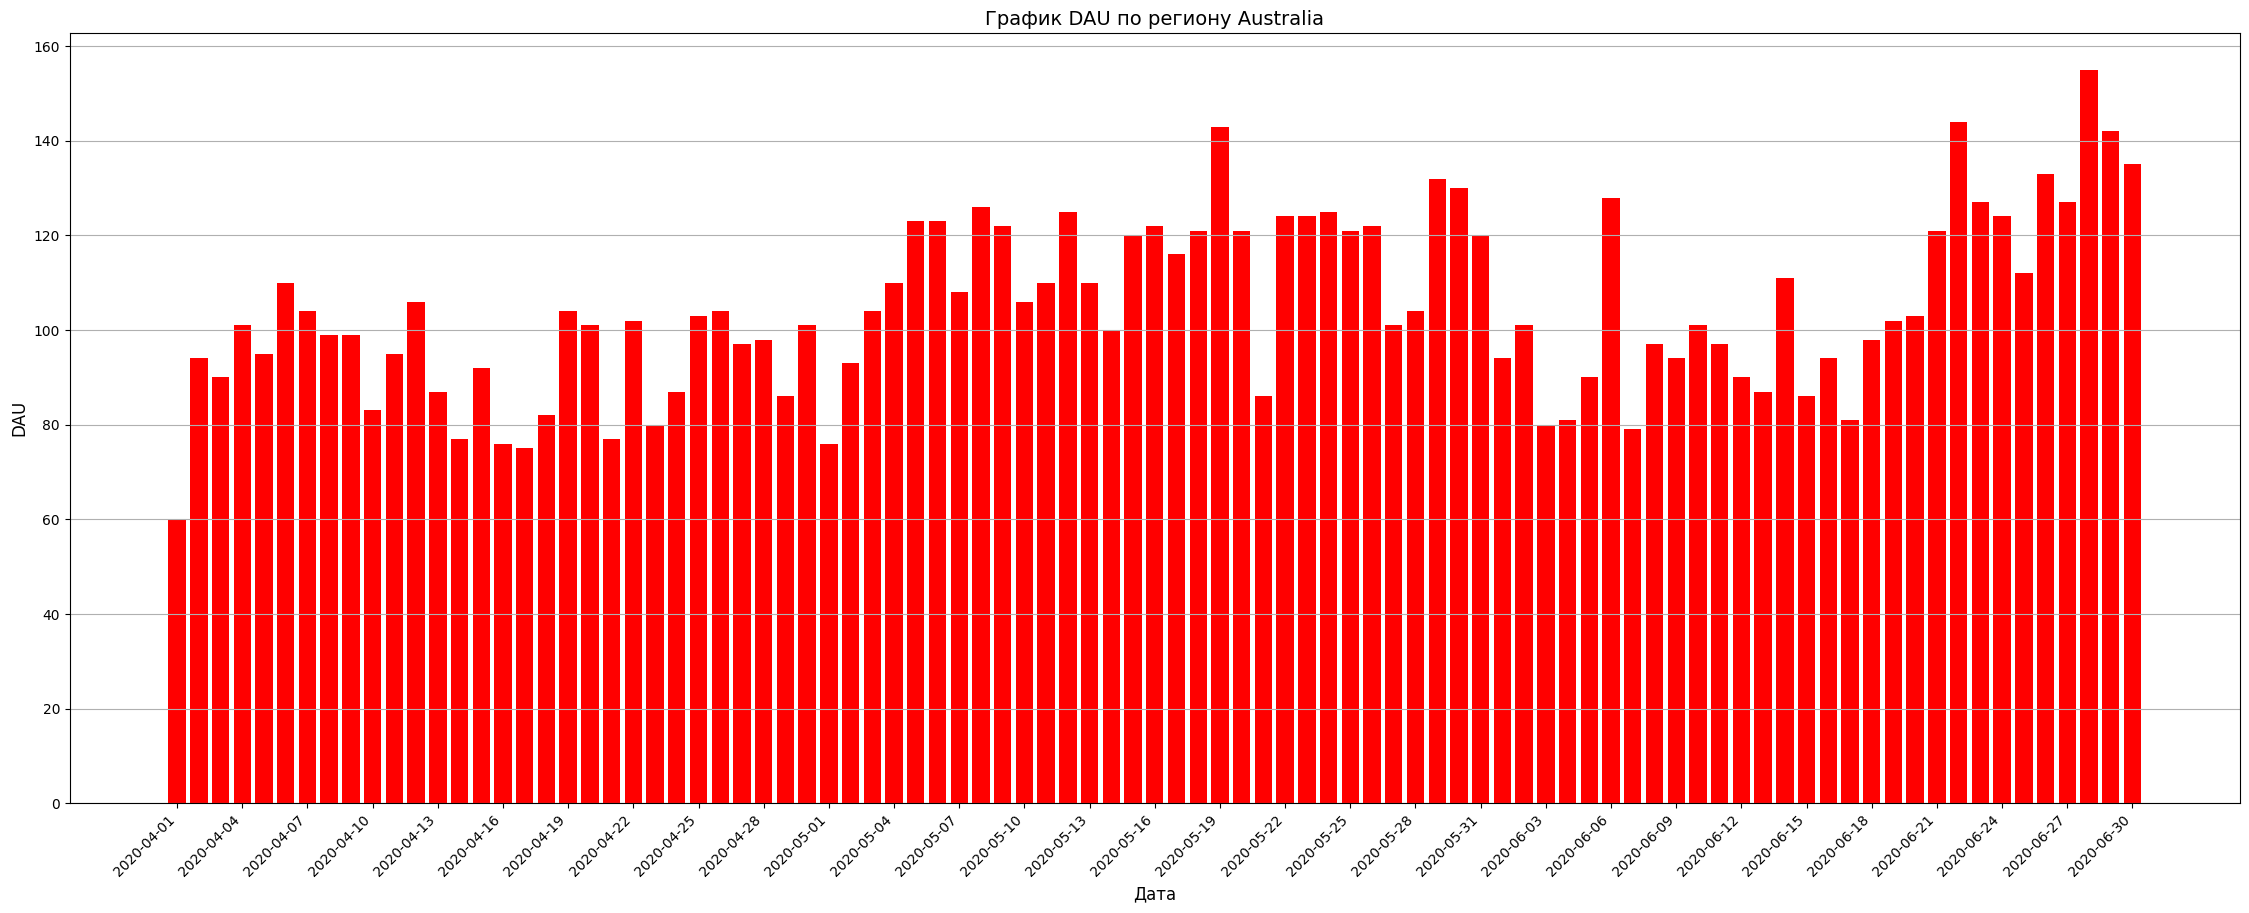

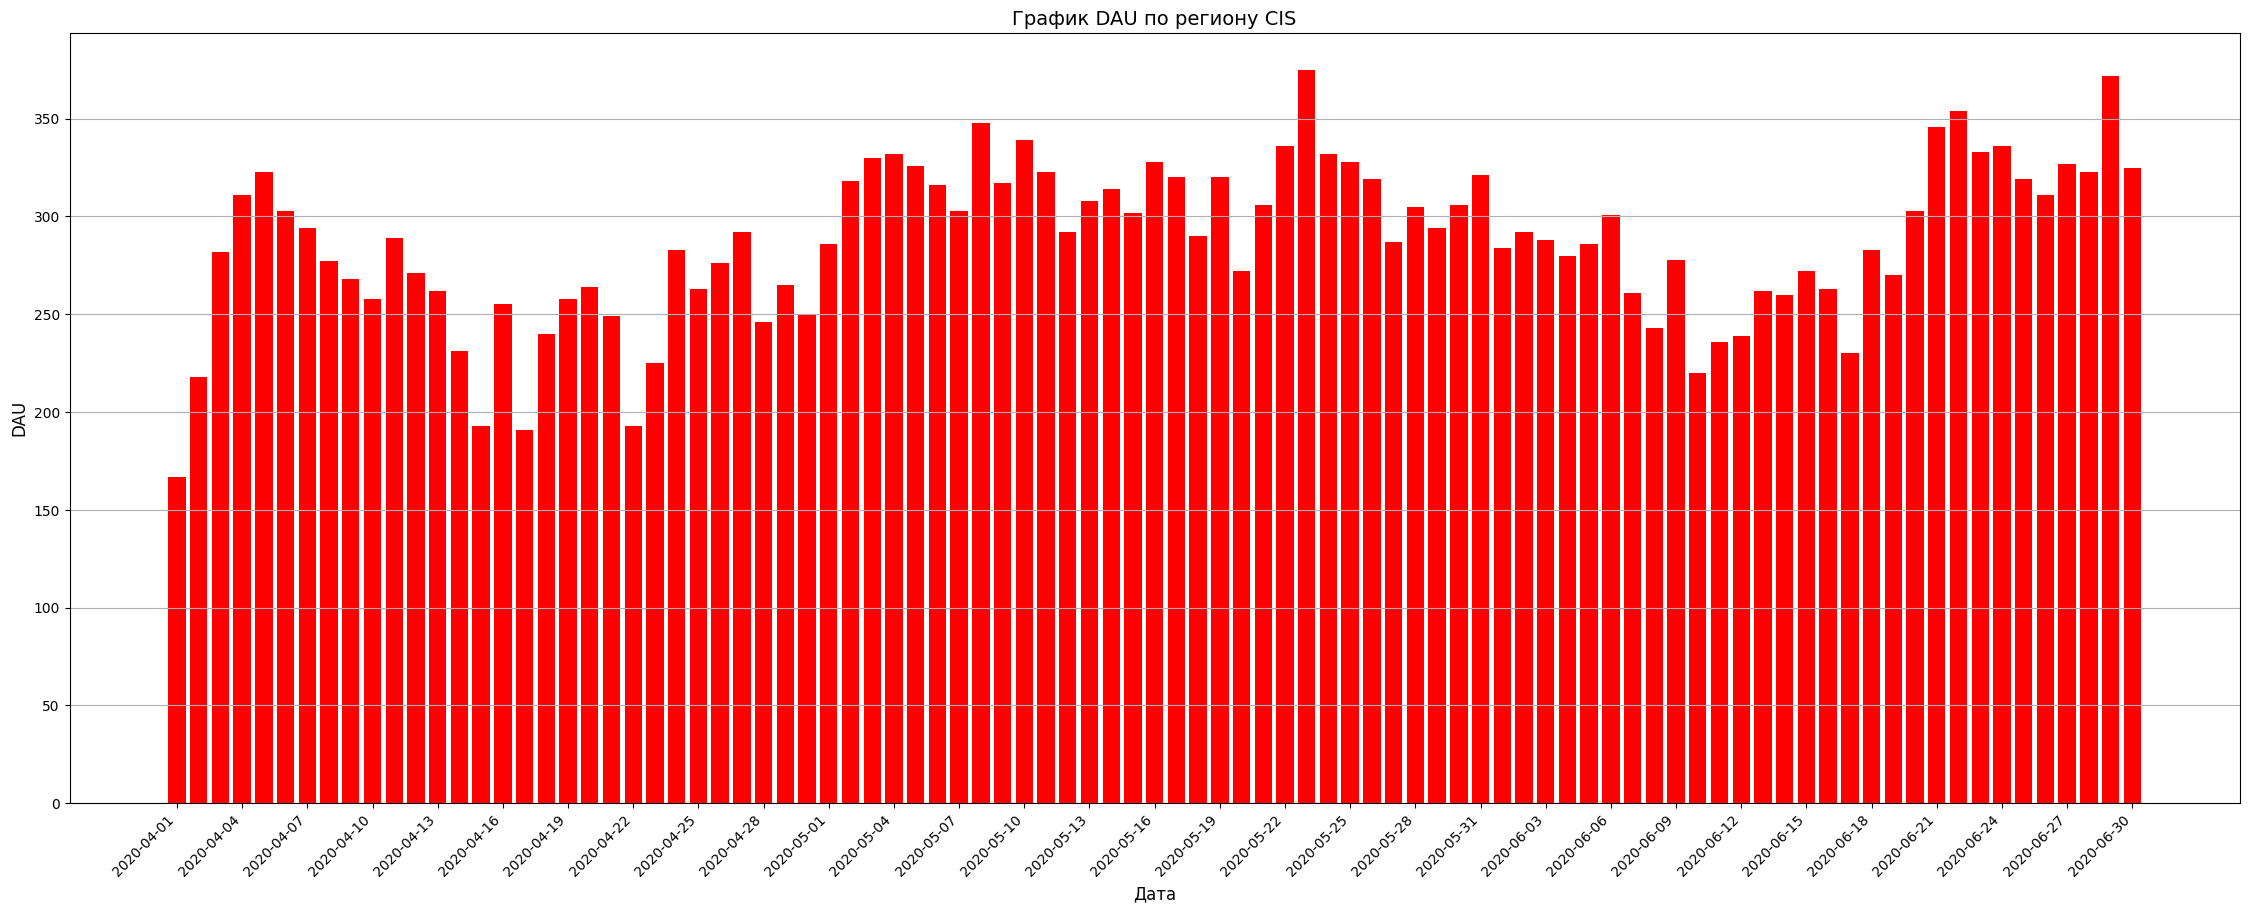

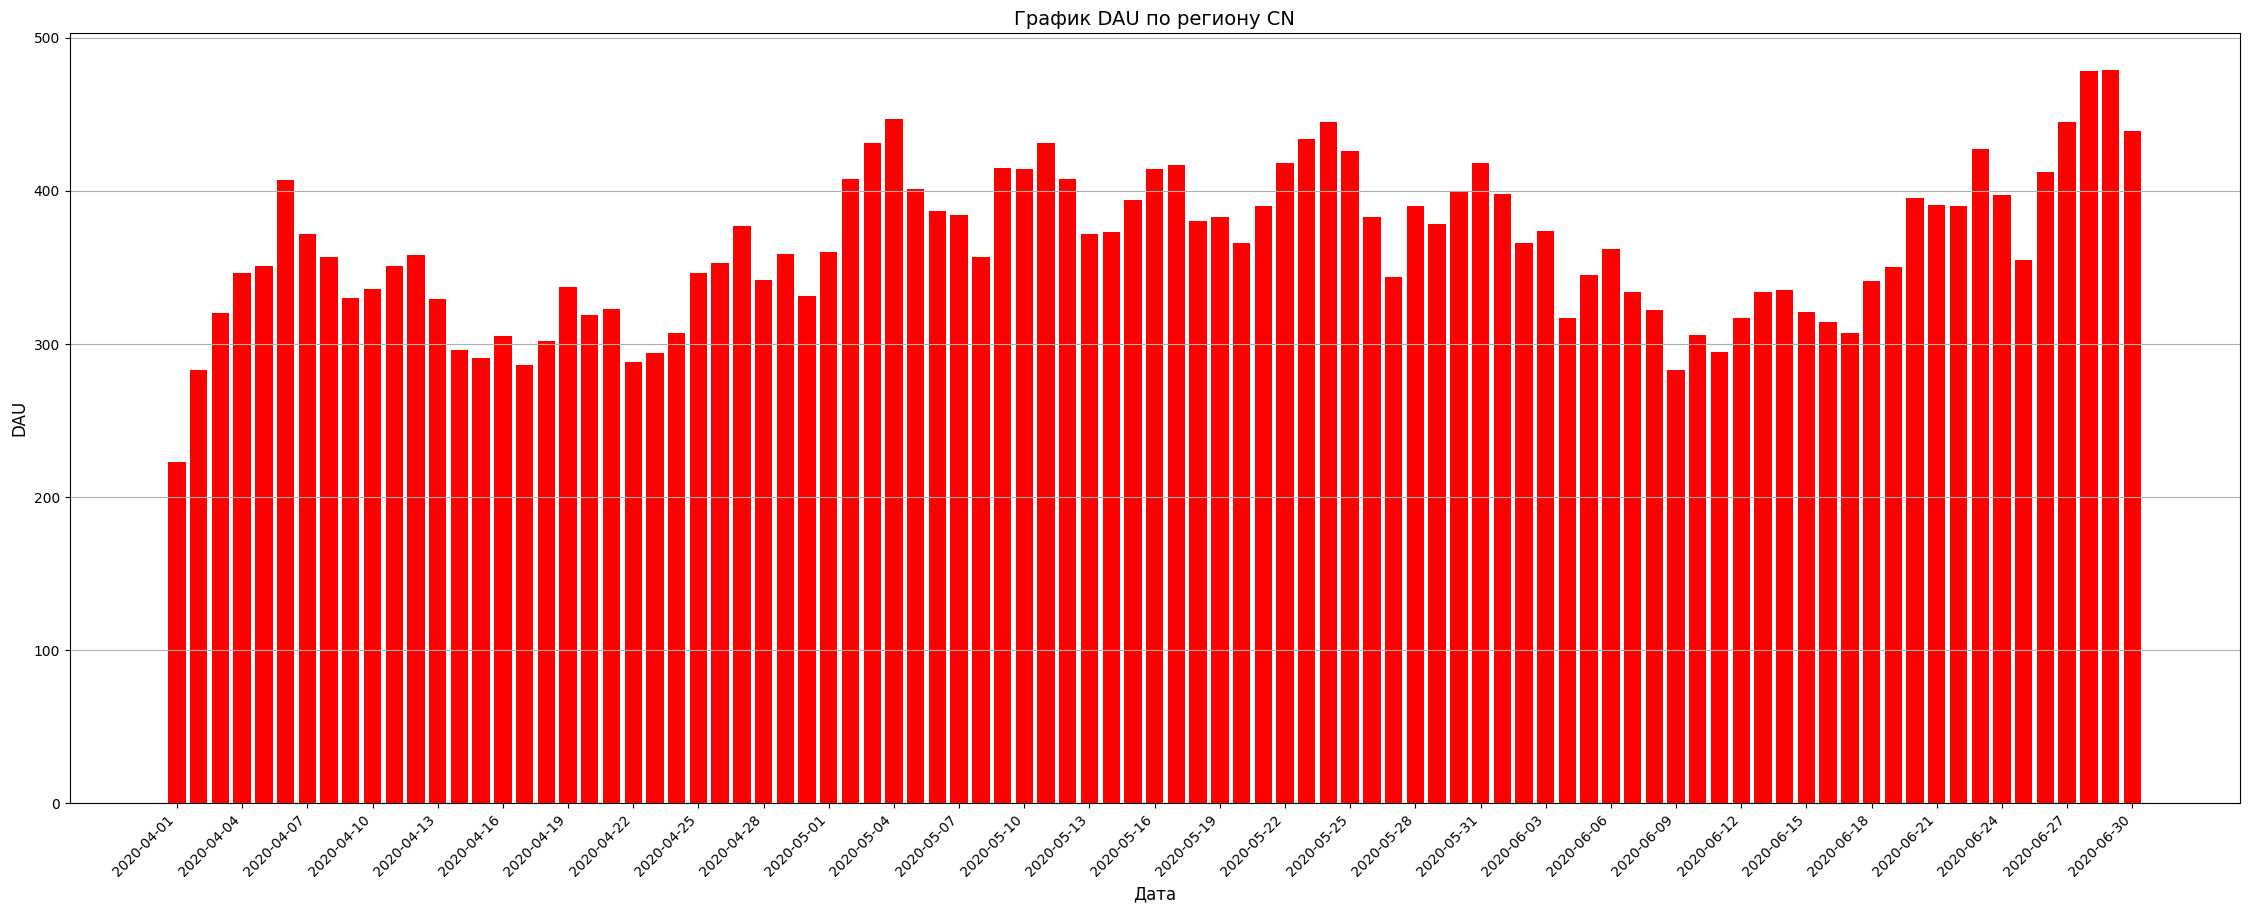

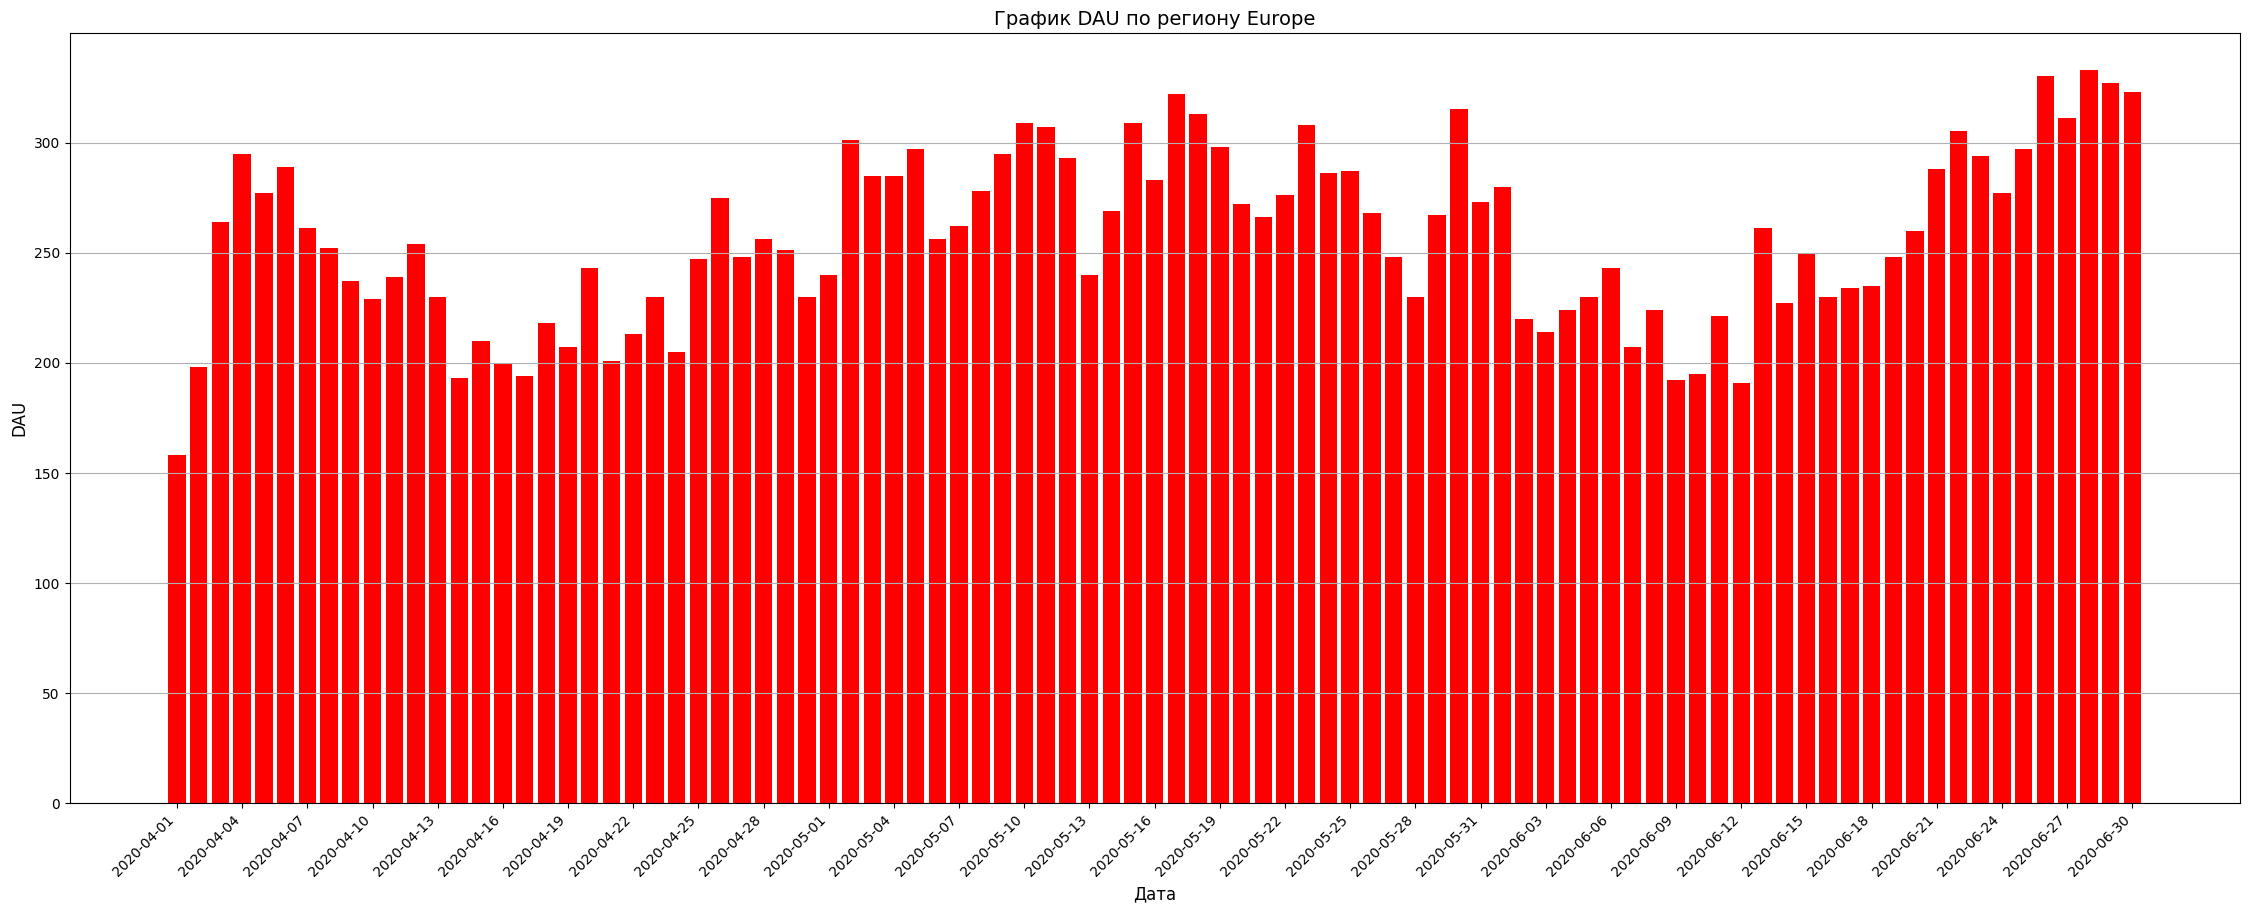

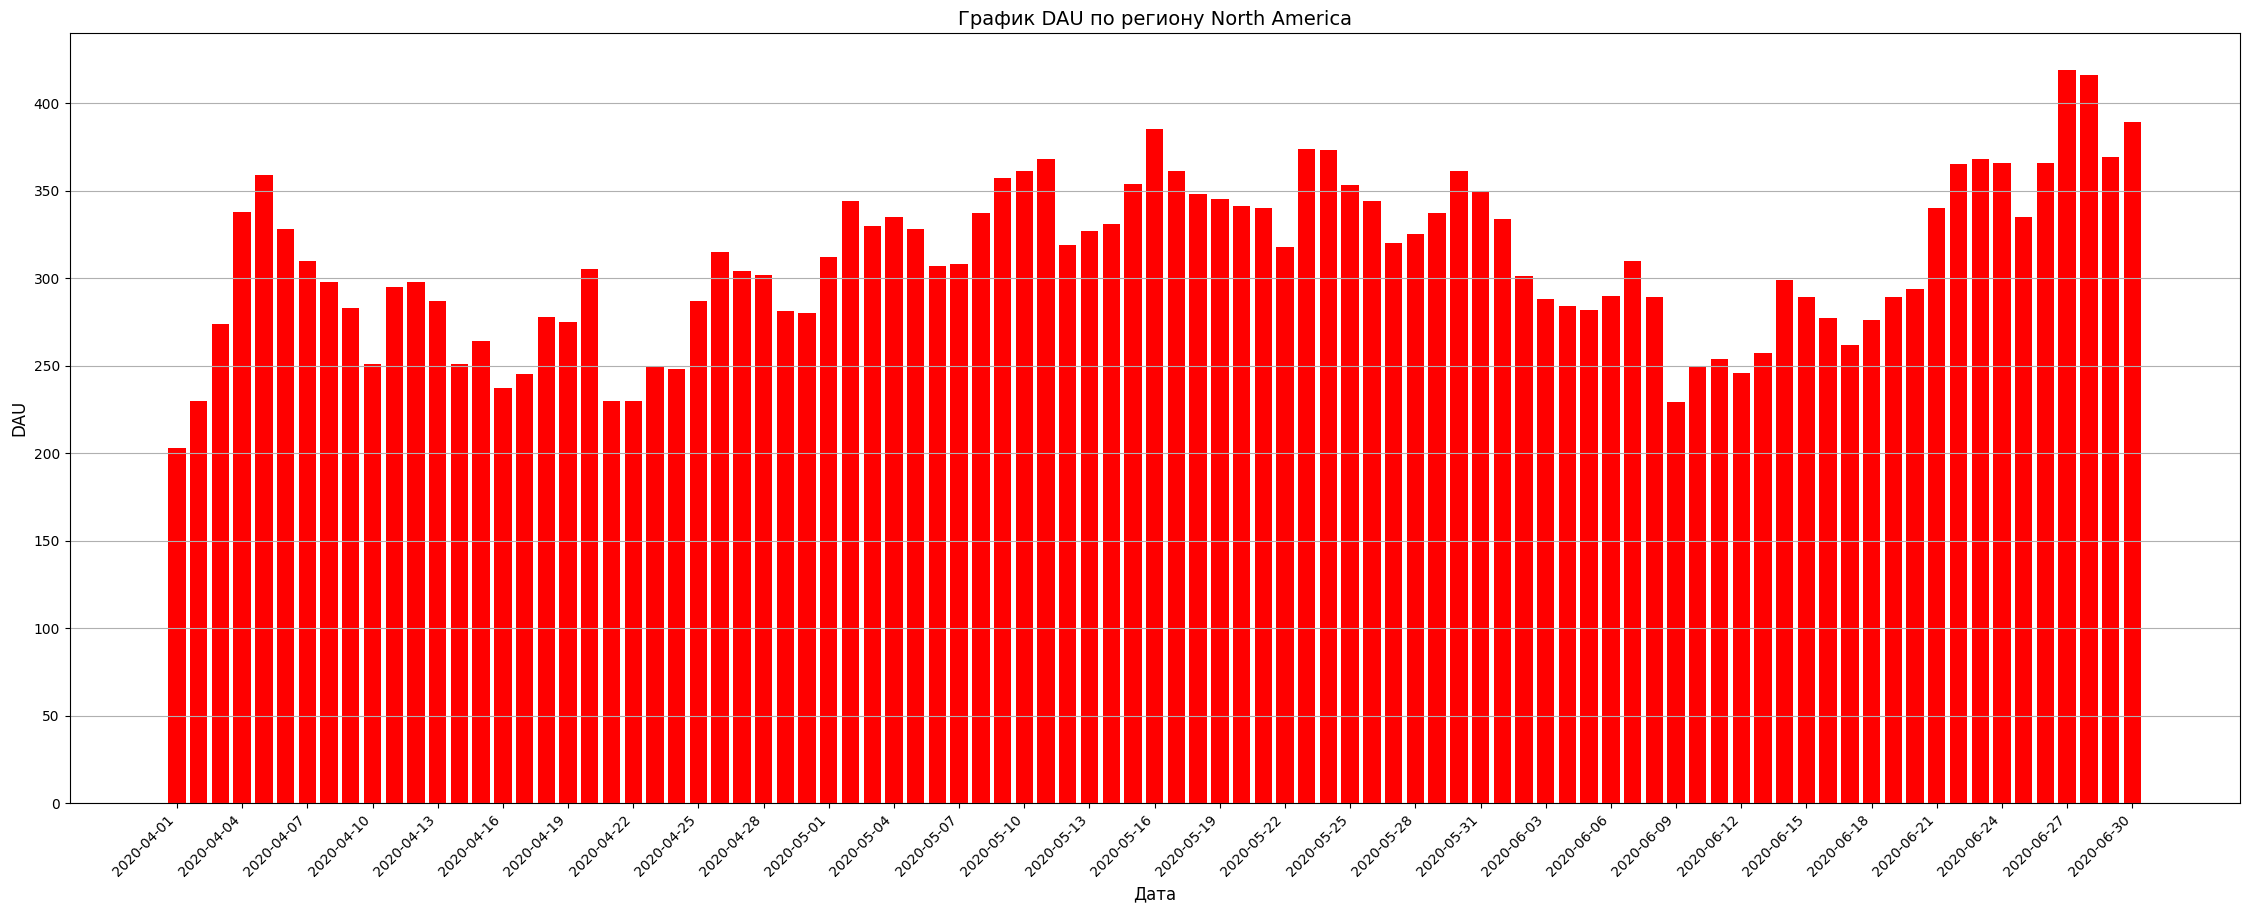

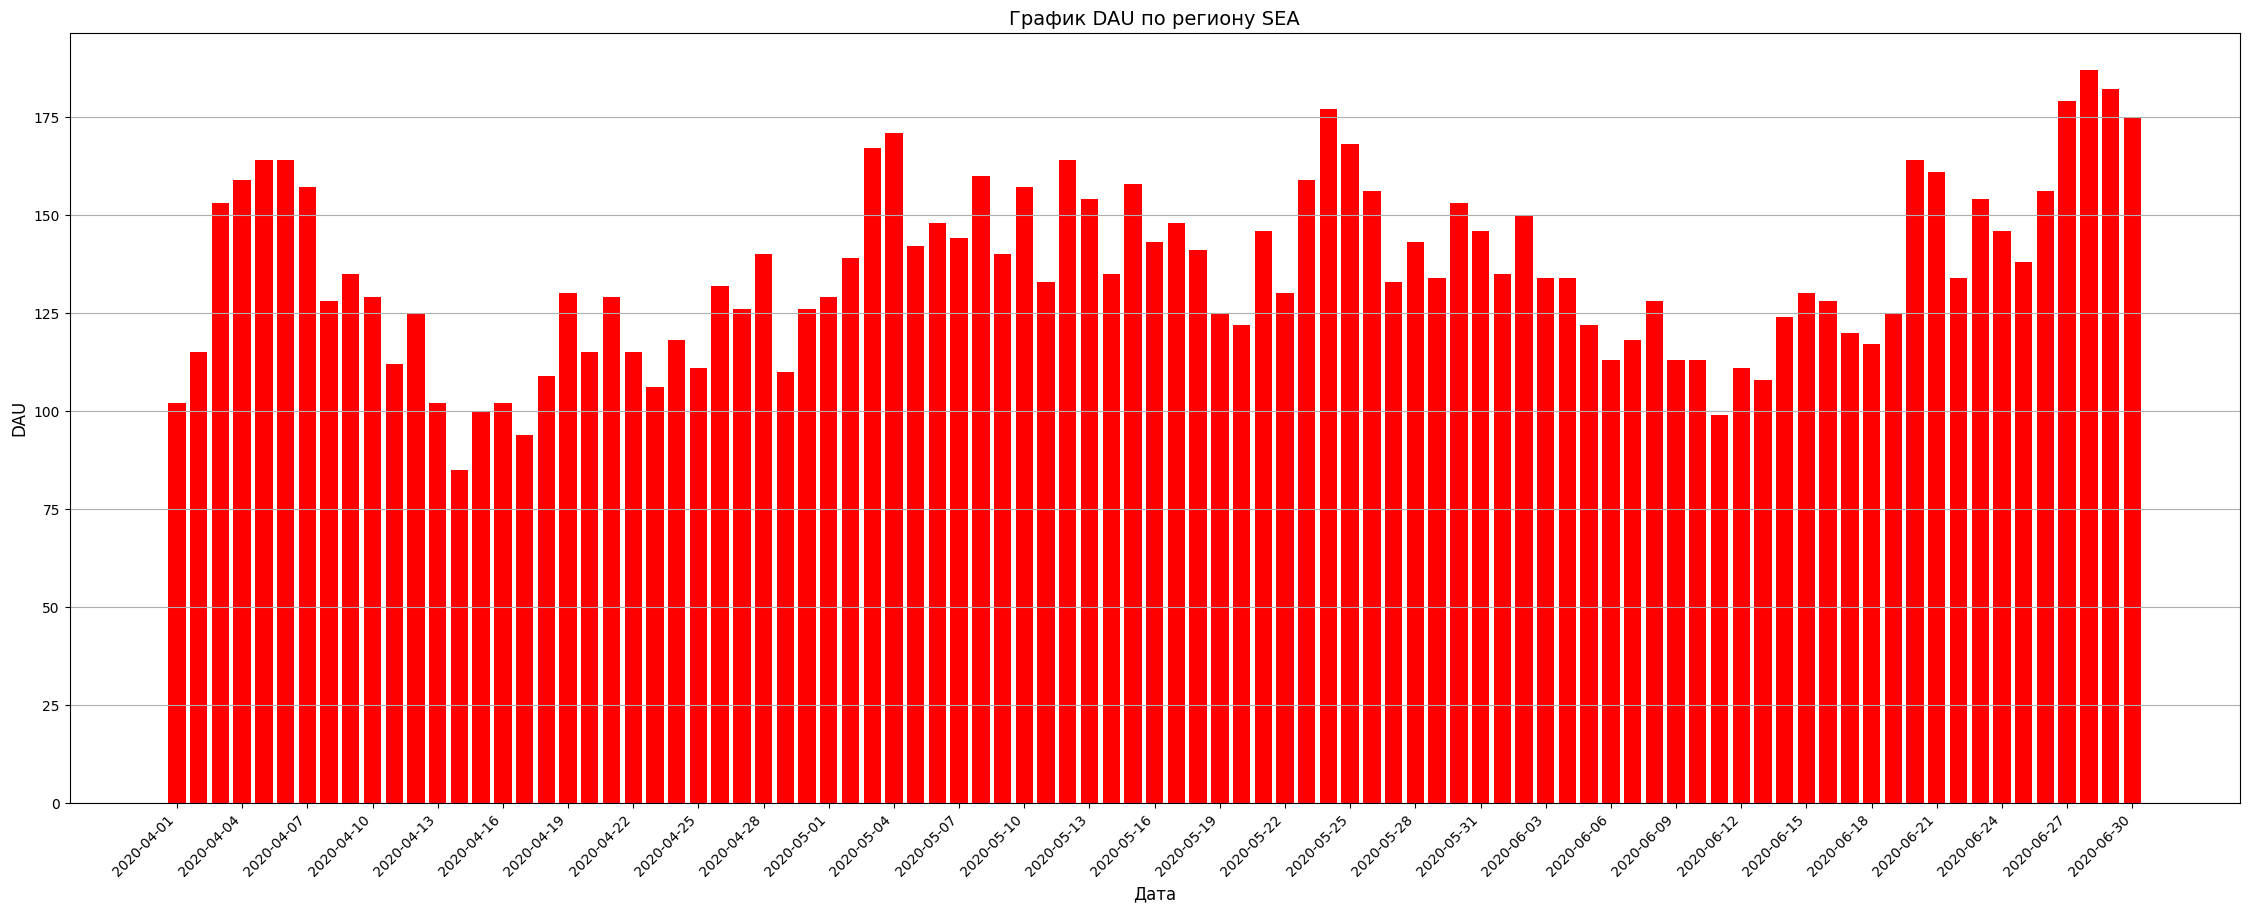

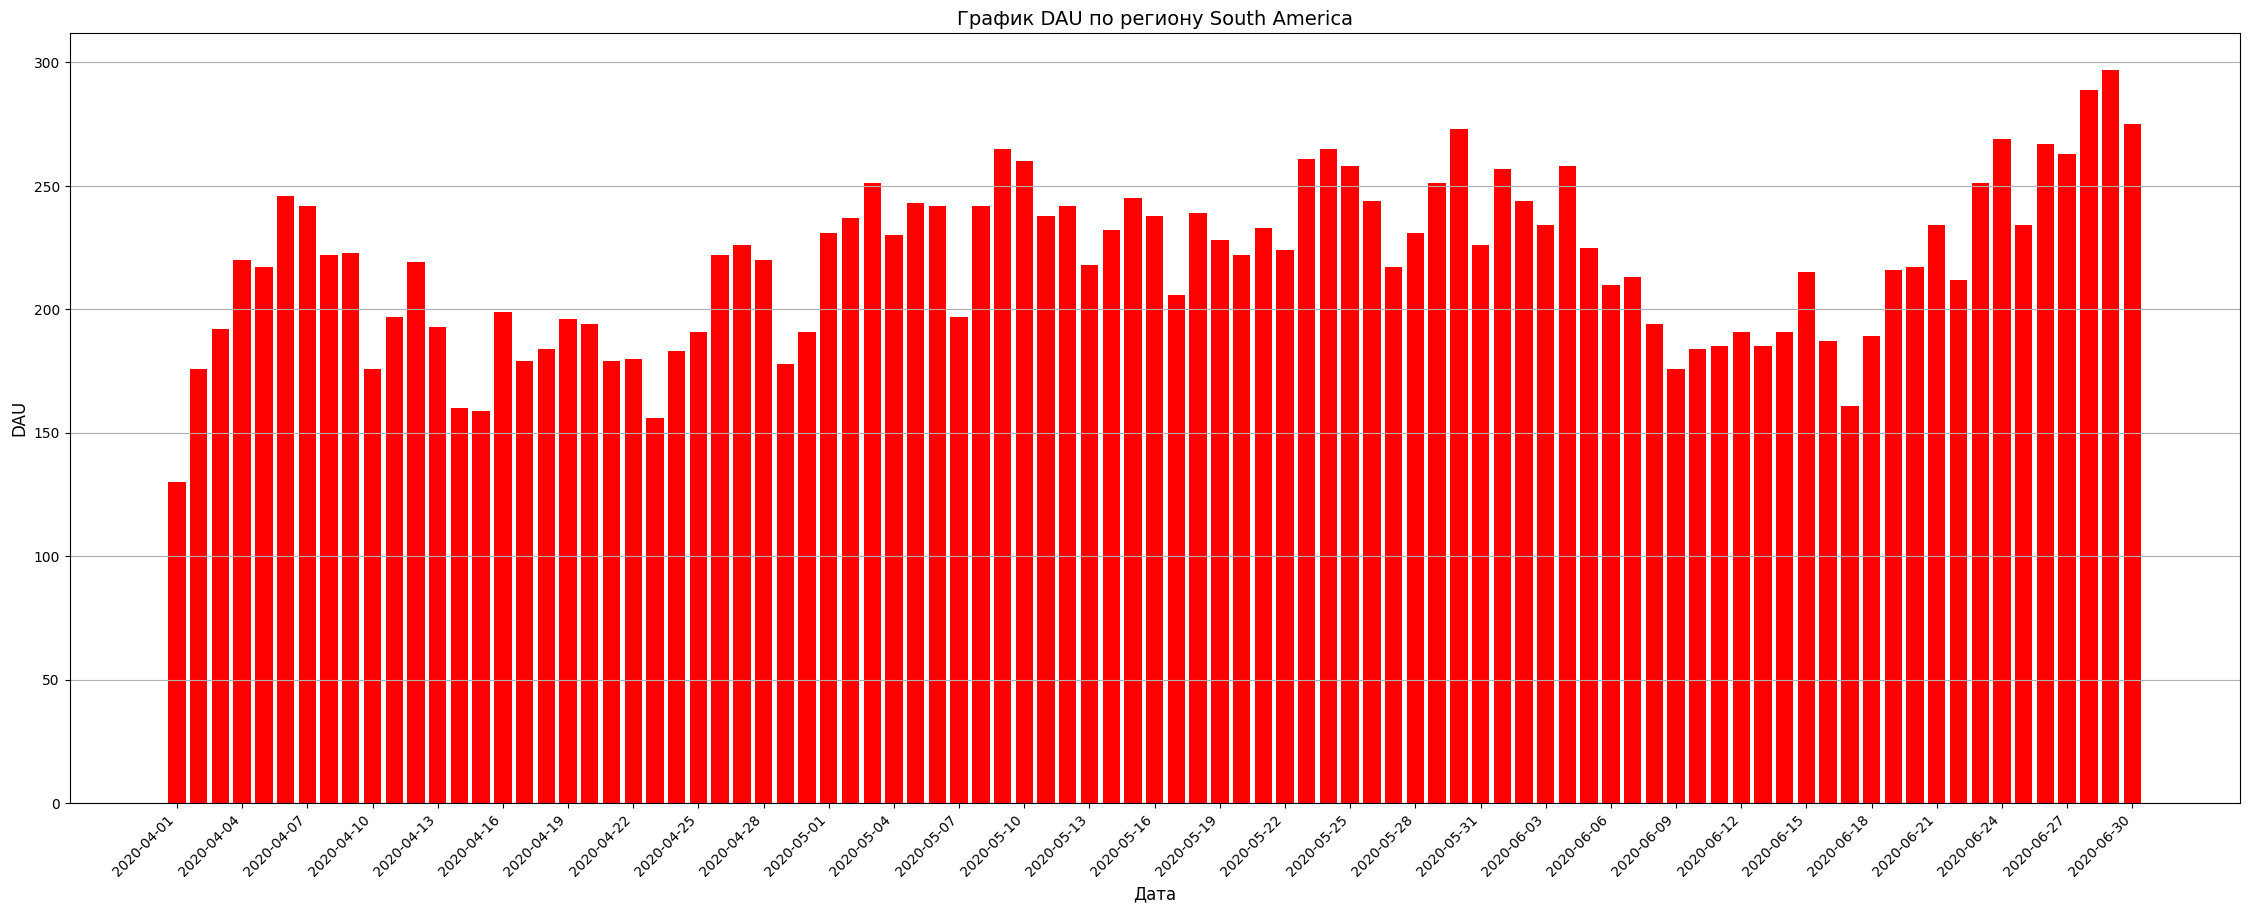

In [53]:
for i in dataRegions.columns[1:]:
    plt.figure(figsize=(28, 10))
    plt.bar(dataRegions['date'], dataRegions[i], color='red')
    plt.title(f'График DAU по региону {i}', fontsize=14)
    plt.ylabel('DAU',  fontsize=12)
    plt.xlabel('Дата', fontsize=12)
    plt.xticks(dataRegions['date'].to_numpy()[::3], rotation=45, horizontalalignment='right')
    plt.grid(axis='y')

In [12]:
mediandataChannels = [(channel, dataChannels[channel].median()) for channel in dataChannels.columns[1:]]
for i in mediandataChannels:
    print(f'Медианная DAU по каналу {i[0]} равна: {i[1]}')

Медианная DAU по каналу BrainPlus равна: 866.0
Медианная DAU по каналу GameAds равна: 385.0
Медианная DAU по каналу JetAds равна: 434.0
Медианная DAU по каналу SenseAds равна: 188.0


In [ ]:
days = dataChannels['date'].size
sumDAU = [sum([dataChannels[channel][i] for channel in dataChannels.columns[1:]]) for i in range(days)]
dataChannels['Total'] = sumDAU

Index(['date', 'BrainPlus', 'GameAds', 'JetAds', 'SenseAds', 'Total'], dtype='object')


In [32]:
dataChannelsPersentage = dataChannels.copy()
for channel in dataChannelsPersentage.columns[1:-1]:
    persentage = [round(dataChannels[channel][i] / dataChannels['Total'][i] * 100, 2) for i in range(days)]
    dataChannelsPersentage[channel] = persentage
dataChannelsPersentage = ChangeToDateTimeAndSetIndex(dataChannelsPersentage)
print(dataChannelsPersentage.head, type(dataChannelsPersentage['date'][0]))


<bound method NDFrame.head of          date  BrainPlus  GameAds  JetAds  SenseAds  Total
0  2020-04-01      55.29    25.75   14.02      4.94   1134
1  2020-04-02      53.33    22.56   16.47      7.64   1427
2  2020-04-03      50.95    24.53   17.58      6.95   1741
3  2020-04-04      50.29    24.26   17.75      7.70   1921
4  2020-04-05      48.97    24.67   17.82      8.55   1942
..        ...        ...      ...     ...       ...    ...
86 2020-06-26      43.70    22.47   24.05      9.78   2158
87 2020-06-27      46.88    21.83   21.48      9.82   2272
88 2020-06-28      47.14    20.78   22.61      9.47   2397
89 2020-06-29      46.36    19.77   23.12     10.75   2362
90 2020-06-30      46.00    20.70   22.87     10.44   2261

[91 rows x 6 columns]> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


[Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-04 00:00:00'), Timestamp('2020-04-05 00:00:00'), Timestamp('2020-04-06 00:00:00'), Timestamp('2020-04-07 00:00:00'), Timestamp('2020-04-08 00:00:00'), Timestamp('2020-04-09 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-04-11 00:00:00'), Timestamp('2020-04-12 00:00:00'), Timestamp('2020-04-13 00:00:00'), Timestamp('2020-04-14 00:00:00'), Timestamp('2020-04-15 00:00:00'), Timestamp('2020-04-16 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-04-20 00:00:00'), Timestamp('2020-04-21 00:00:00'), Timestamp('2020-04-22 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-04-26 00:00:00'), Timestamp('2020-04-27 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('20

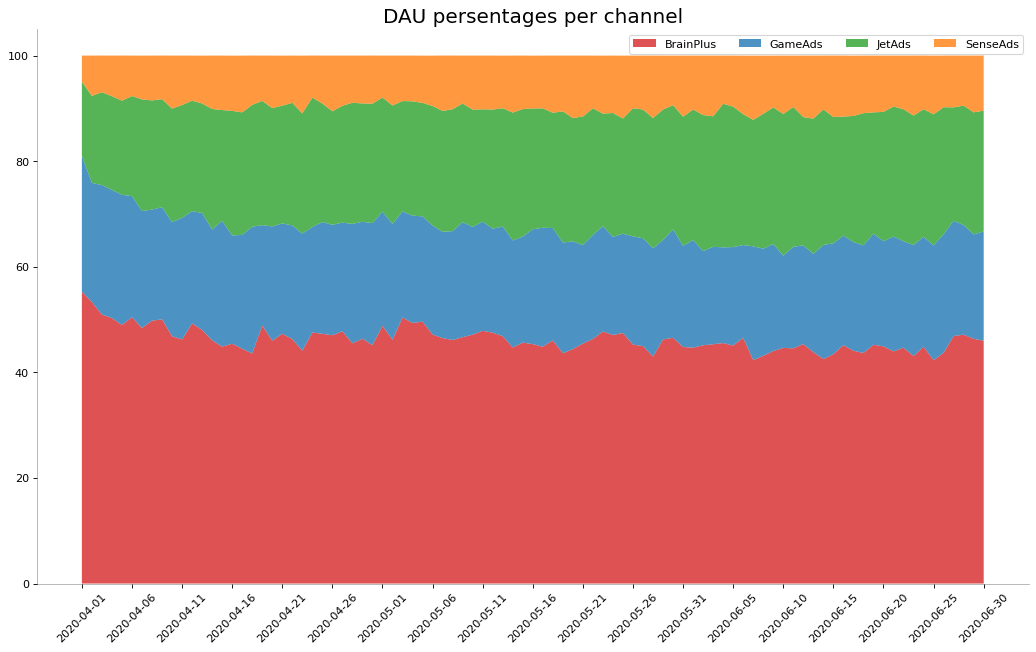

In [38]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = dataChannelsPersentage.columns[1:-1]
labs = columns.values.tolist()
x  = dataChannelsPersentage['date'].tolist()
print(x)
y = np.vstack([dataChannelsPersentage[channel].values.tolist() for channel in columns])
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)
ax.set_title('DAU persentages per channel', fontsize=18)
plt.xticks(x[::5], fontsize=10, rotation = 45,  horizontalalignment='center')
ax.legend(fontsize=10, ncol=4)
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


Заметно, что с течением времени больший процент пользователей начинают приходить с канала JetAds, популярность же канала BrainPlus, снижается, наименьший процент пользователей приходит с канала SenseAds, однако, процент пользователей с этого канала увеличиватеся.

In [ ]:
dataRegionsMonthly = pd.read_excel("hw_lesson03_mau_region.xlsx")
print(dataRegionsMonthly.head(10))
print(dataRegionsMonthly.info())

   month  Africa  Australia   CIS    CN  Europe  North America   SEA  \
0      4    2490       1534  4229  5392    3845           4639  2058   
1      5    3190       1937  5432  6884    4872           5930  2587   
2      6    2805       1846  4941  6225    4387           5383  2361   

   South America  
0           3241  
1           4119  
2           3805  


In [ ]:
dataRegionsMonthly.set_index('month')

In [50]:
dataRegionsMonthly.loc[dataRegionsMonthly['month'] == 5, "Africa"] = 5000


In [51]:
def mau_sum(row):
    sum_au_africa = row['Africa'] + row['Australia']
    if sum_au_africa > row['CIS']:
        return sum_au_africa
    else:
        return 0
dataRegionsMonthly.apply(mau_sum, axis=1)

0       0
1    6937
2       0
dtype: int64

In [52]:
dataRegionsMonthly['EU превышает порог'] = dataRegionsMonthly['Europe'] >= 4000
dataRegionsMonthly.head()

,month,Africa,Australia,CIS,CN,Europe,North America,SEA,South America,EU превышает порог
0,4,2490,1534,4229,5392,3845,4639,2058,3241,False
1,5,5000,1937,5432,6884,4872,5930,2587,4119,True
2,6,2805,1846,4941,6225,4387,5383,2361,3805,True


In [68]:
def FindPersentage(row):
    for column in row.index[1:-1]:
        row[column] = round((row[column]/row['Total'])*100, 2)
    return row

        date  BrainPlus  GameAds  JetAds  SenseAds
0 2020-04-01        627      292     159        56
1 2020-04-02        761      322     235       109
2 2020-04-03        887      427     306       121
3 2020-04-04        966      466     341       148
4 2020-04-05        951      479     346       166
5 2020-04-06       1027      467     386       156
6 2020-04-07        922      422     403       158
7 2020-04-08        903      382     375       154
8 2020-04-09        861      365     352       142
9 2020-04-10        756      349     347       162
        date  BrainPlus  GameAds  JetAds  SenseAds  Total
0 2020-04-01      55.29    25.75   14.02      4.94   1134
1 2020-04-02      53.33    22.56   16.47      7.64   1427
2 2020-04-03      50.95    24.53   17.58      6.95   1741
3 2020-04-04      50.29    24.26   17.75      7.70   1921
4 2020-04-05      48.97    24.67   17.82      8.55   1942
[Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 

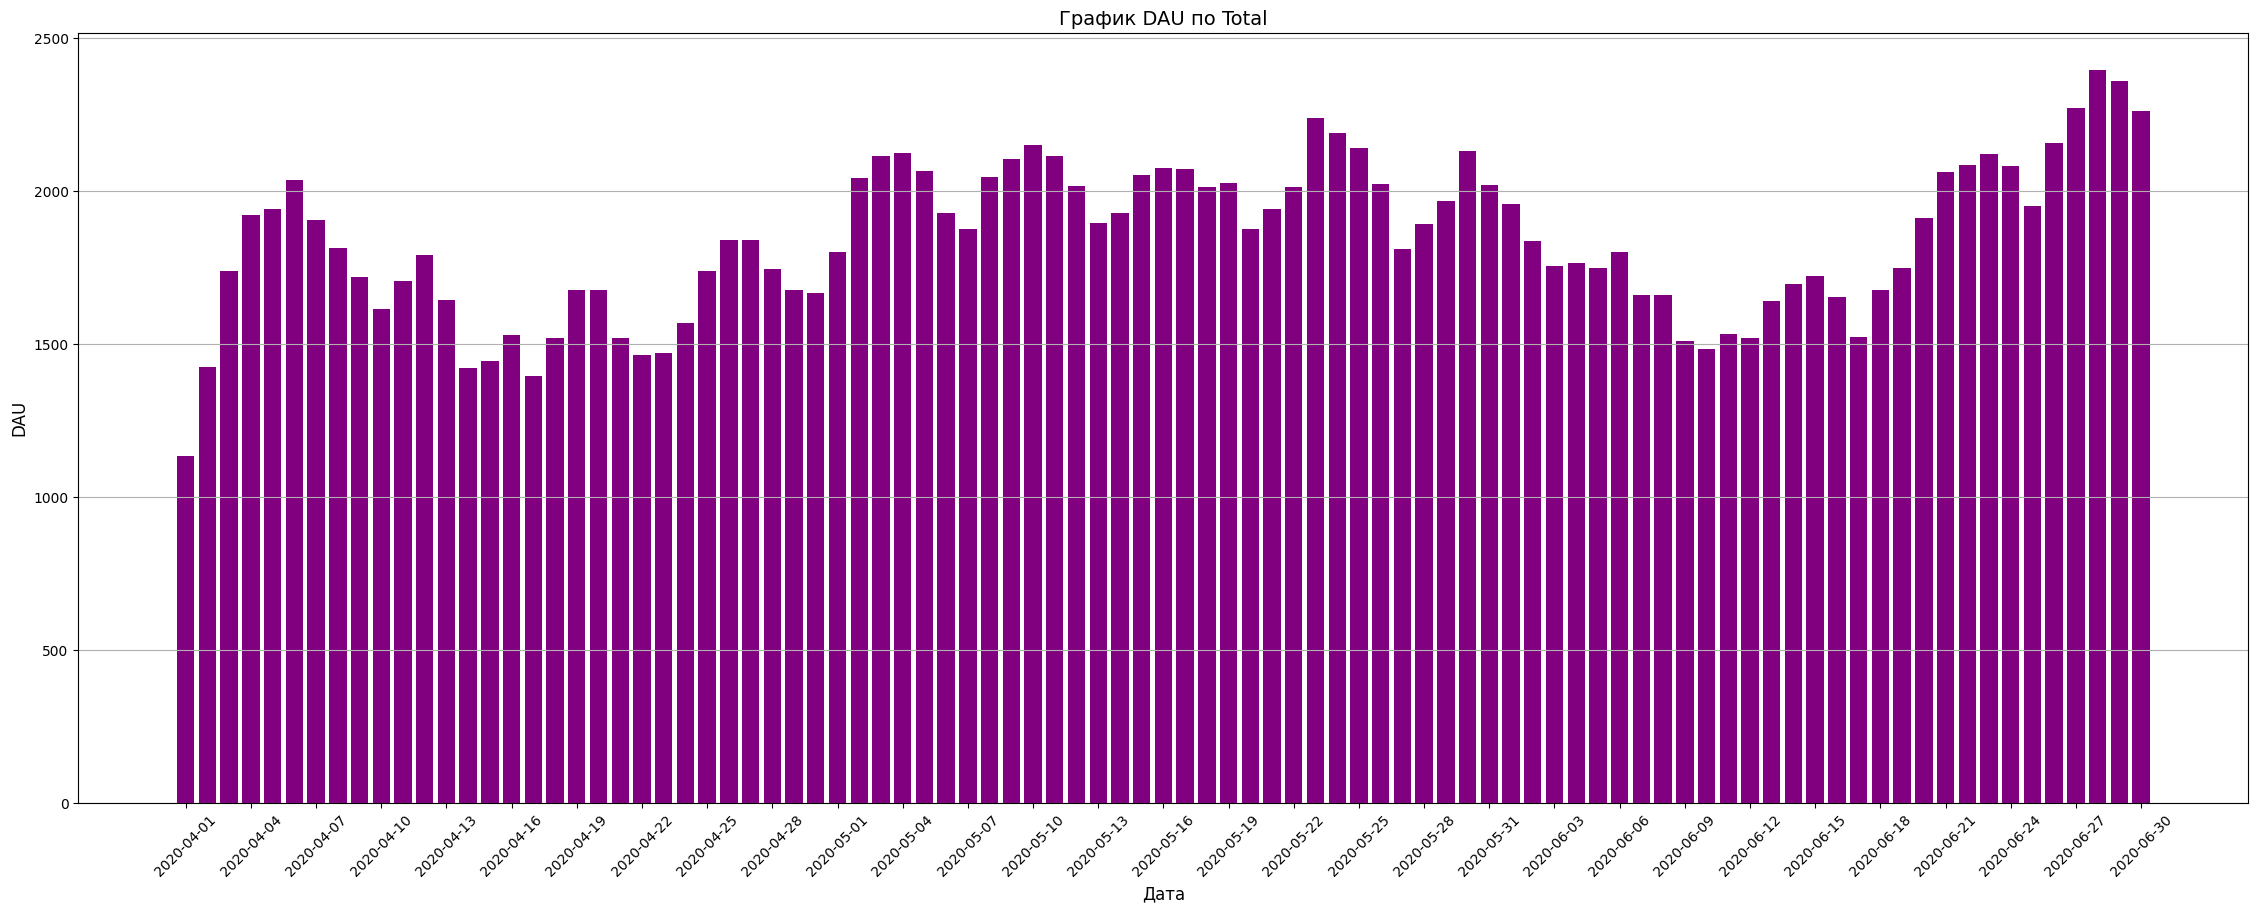

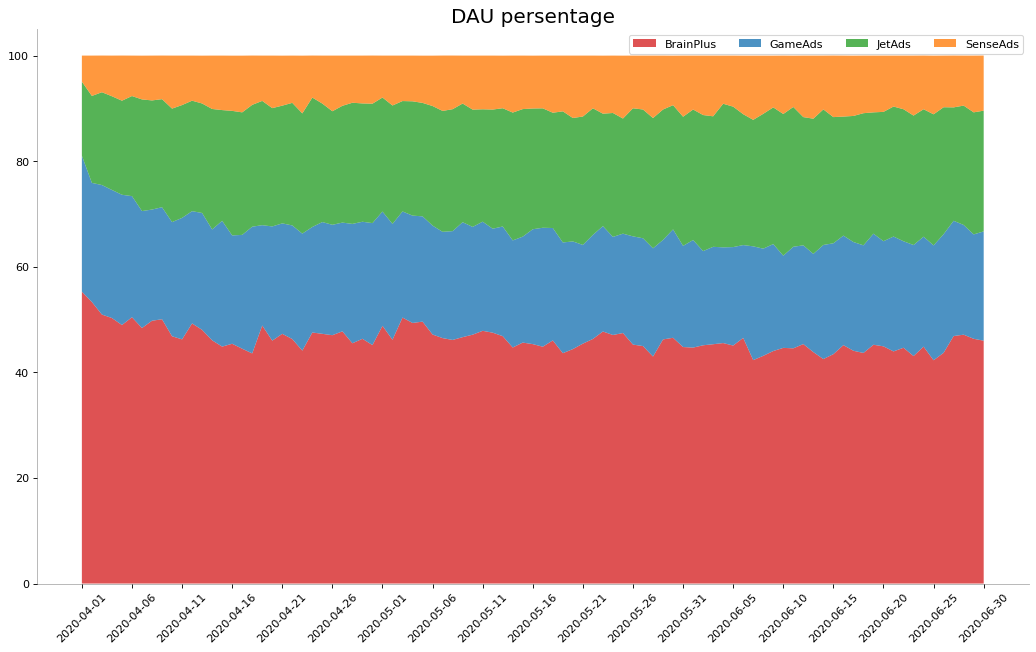

In [69]:
def AutomaticBasicDAURaserch(dfname):
    df = pd.read_excel(dfname)
    print(df.head(10))
    sumDAU = [sum([df[channel][i] for channel in df.columns[1:]]) for i in range(len(df[df.columns[0]].values.tolist()))]
    df['Total'] = sumDAU
    plt.figure(figsize=(28, 10))
    plt.bar(df[df.columns[0]], df[i], color='purple')
    plt.title(f'График DAU по {i}', fontsize=14)
    plt.ylabel('DAU',  fontsize=12)
    plt.xlabel('Дата', fontsize=12)
    plt.xticks(df[df.columns[0]].to_numpy()[::3], rotation=45, horizontalalignment='center')
    plt.grid(axis='y')
    df = df.apply(FindPersentage, axis=1)
    print(df.head())
    mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']
    fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
    columns = df.columns[1:-1]
    labs = columns.values.tolist()
    x  = df[df.columns[0]].tolist()
    print(x)
    y = np.vstack([df[channel].values.tolist() for channel in columns])
    ax = plt.gca()
    ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)
    ax.set_title('DAU persentage', fontsize=18)
    plt.xticks(x[::5], fontsize=10, rotation = 45,  horizontalalignment='center')
    ax.legend(fontsize=10, ncol=4)
    plt.gca().spines["top"].set_alpha(0)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(0)
    plt.gca().spines["left"].set_alpha(.3)

AutomaticBasicDAURaserch("hw_lesson03_dau_channel.xlsx")

        date  Africa  Australia  CIS   CN  Europe  North America  SEA  \
0 2020-04-01      91         60  167  223     158            203  102   
1 2020-04-02     113         94  218  283     198            230  115   
2 2020-04-03     166         90  282  320     264            274  153   
3 2020-04-04     151        101  311  346     295            338  159   
4 2020-04-05     156         95  323  351     277            359  164   
5 2020-04-06     189        110  303  407     289            328  164   
6 2020-04-07     165        104  294  372     261            310  157   
7 2020-04-08     181         99  277  357     252            298  128   
8 2020-04-09     145         99  268  330     237            283  135   
9 2020-04-10     152         83  258  336     229            251  129   

   South America  
0            130  
1            176  
2            192  
3            220  
4            217  
5            246  
6            242  
7            222  
8            223  
9     

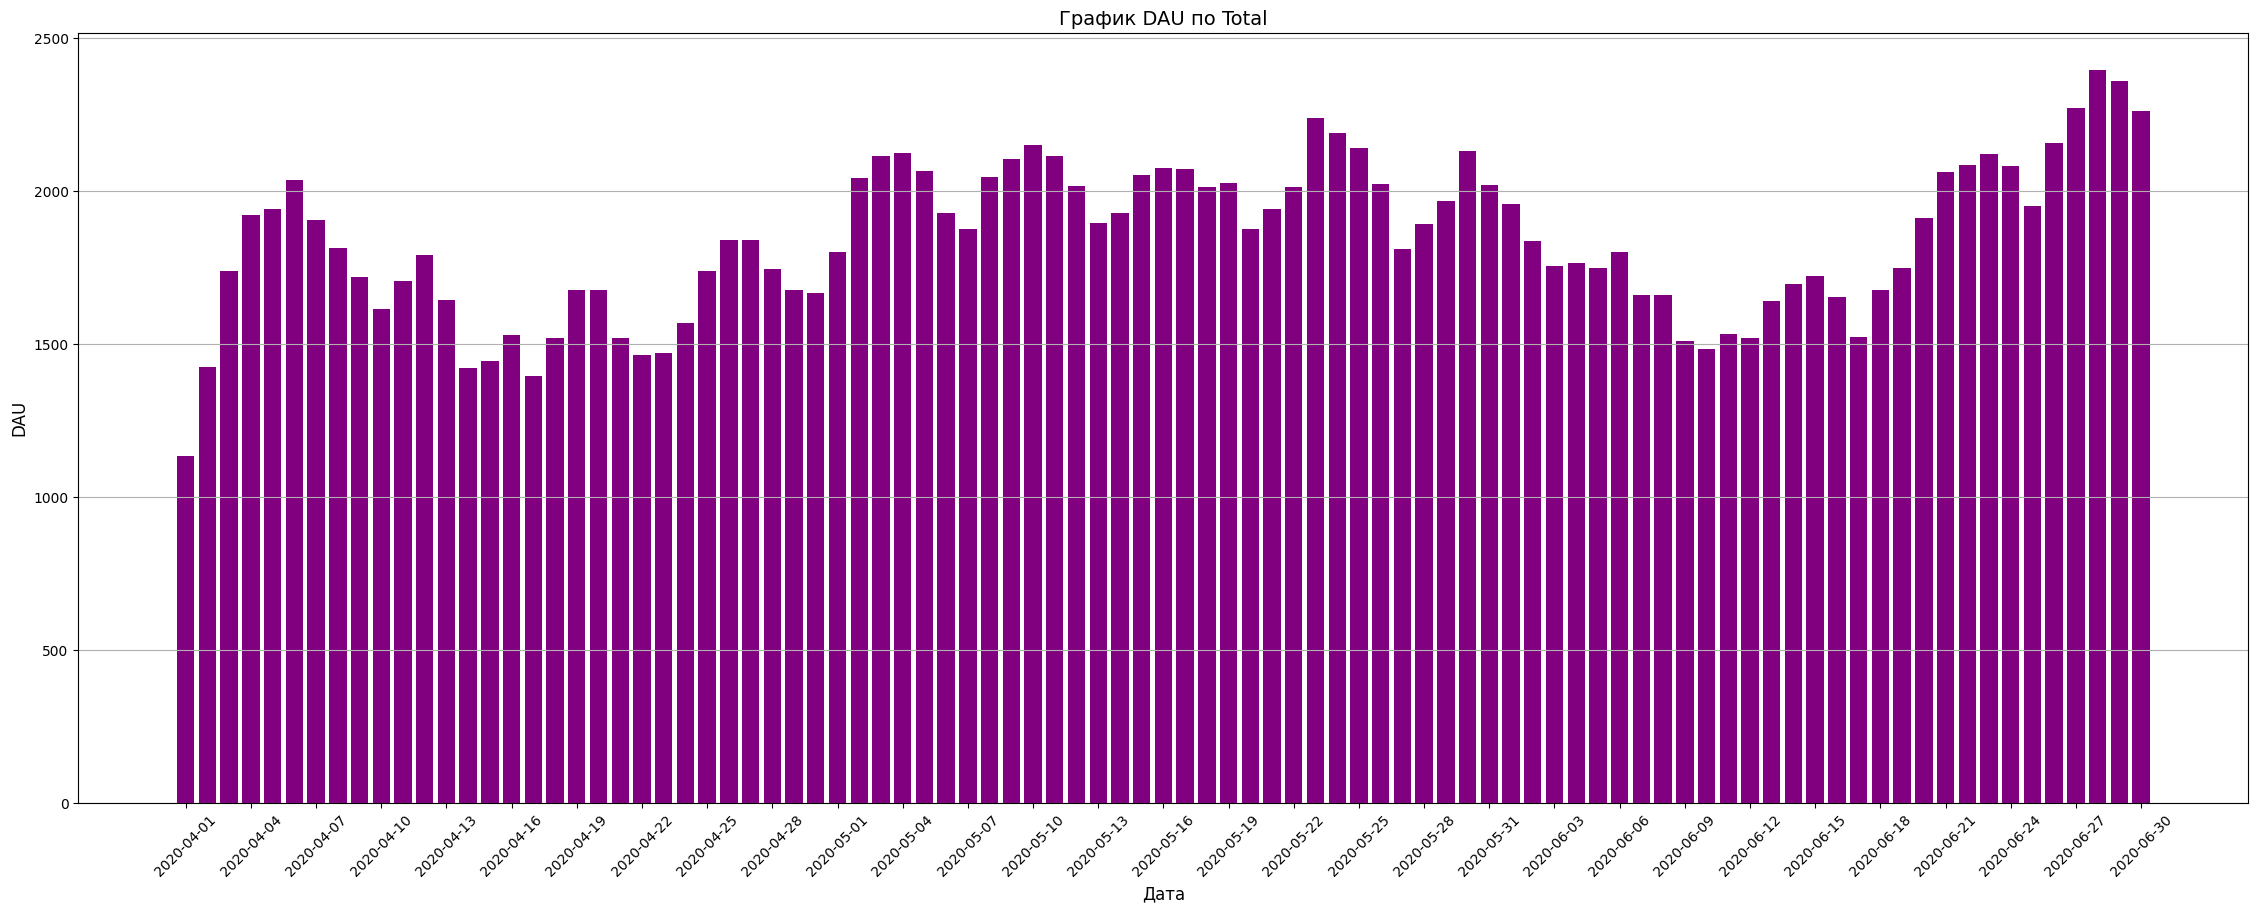

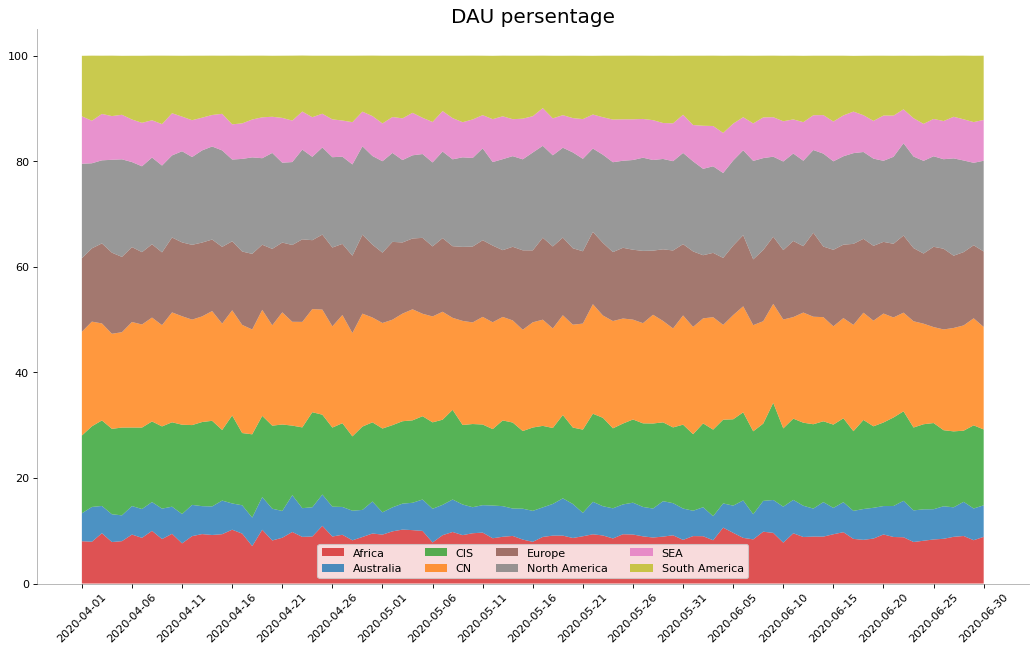

In [70]:
AutomaticBasicDAURaserch("hw_lesson03_dau_region.xlsx")

        date  Andoroid  iPhone
0 2020-04-01       786     348
1 2020-04-02       996     431
2 2020-04-03      1193     548
3 2020-04-04      1307     614
4 2020-04-05      1297     645
5 2020-04-06      1413     623
6 2020-04-07      1325     580
7 2020-04-08      1278     536
8 2020-04-09      1213     507
9 2020-04-10      1103     511
        date  Andoroid  iPhone  Total
0 2020-04-01     69.31   30.69   1134
1 2020-04-02     69.80   30.20   1427
2 2020-04-03     68.52   31.48   1741
3 2020-04-04     68.04   31.96   1921
4 2020-04-05     66.79   33.21   1942
[Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-04-04 00:00:00'), Timestamp('2020-04-05 00:00:00'), Timestamp('2020-04-06 00:00:00'), Timestamp('2020-04-07 00:00:00'), Timestamp('2020-04-08 00:00:00'), Timestamp('2020-04-09 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-04-11 00:00:00'), Timestamp('2020-04-12 00:00:00'), Timestamp('2020-04-13 

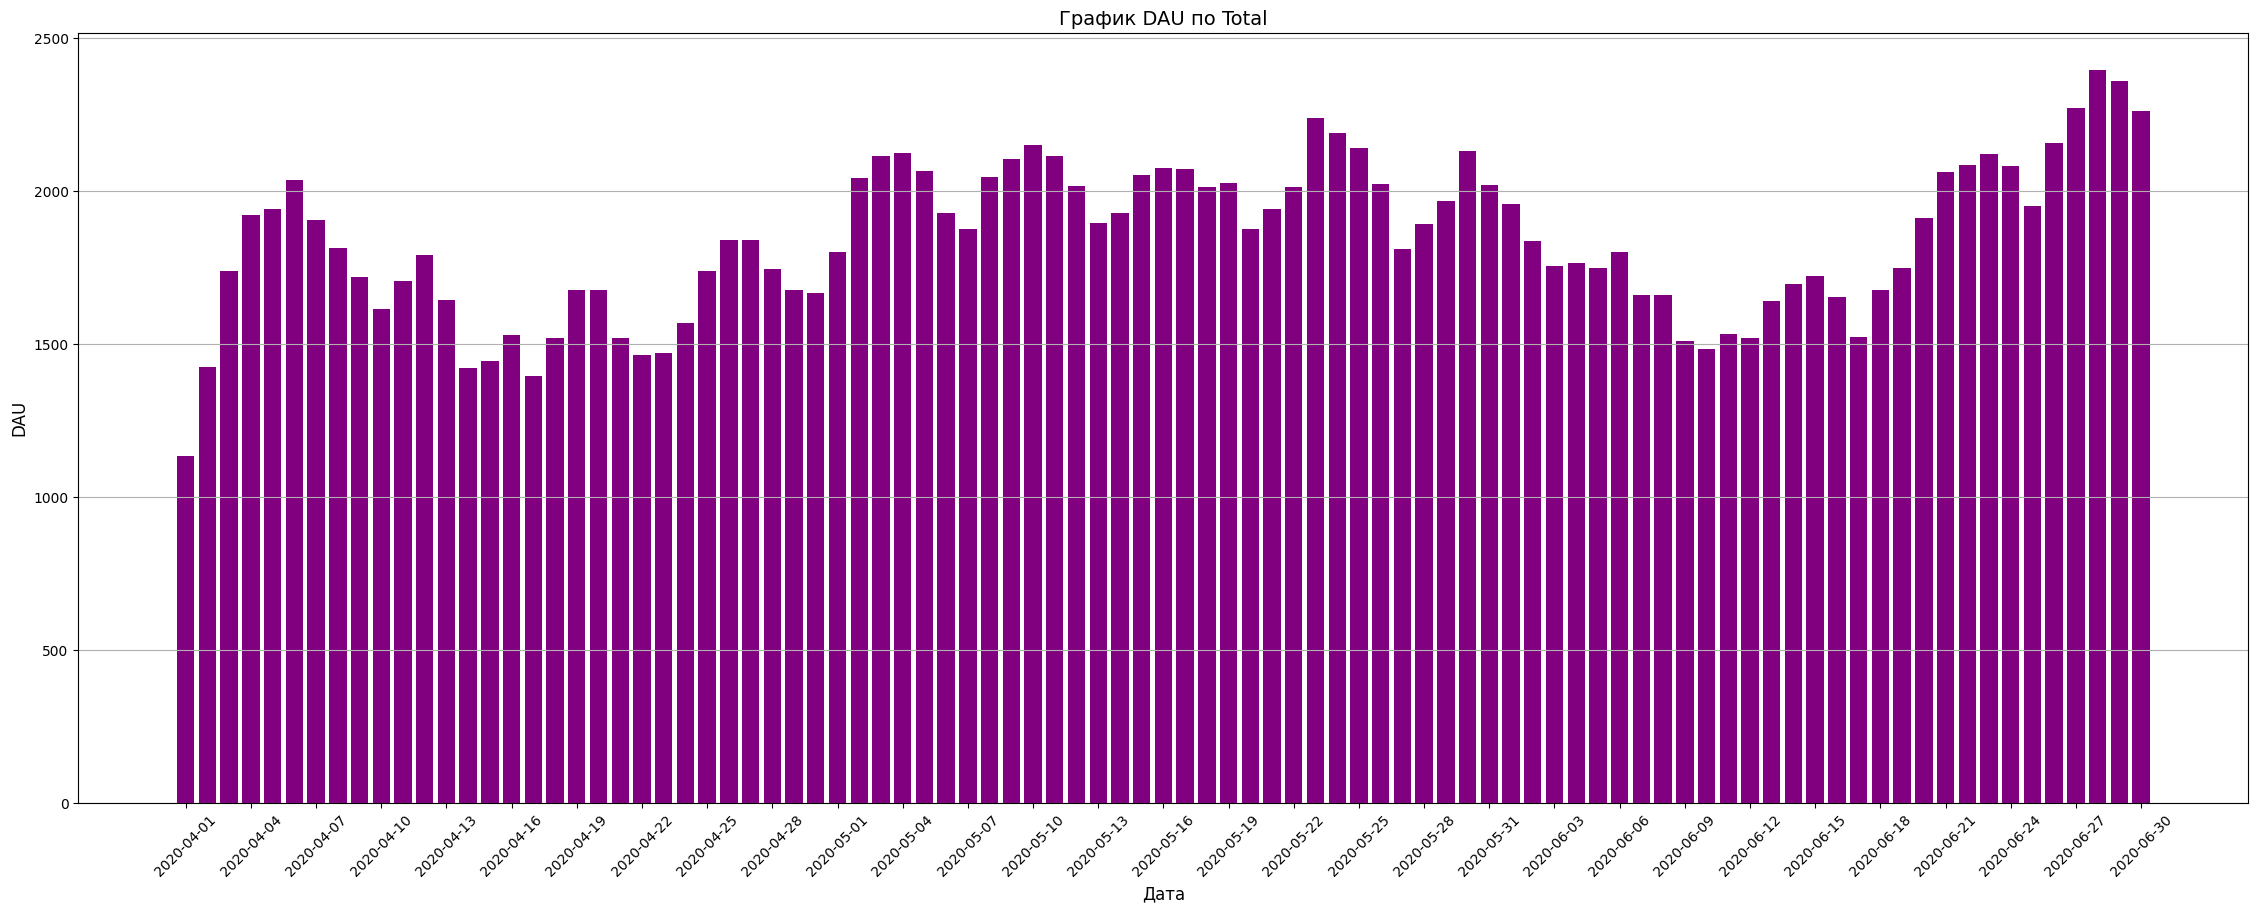

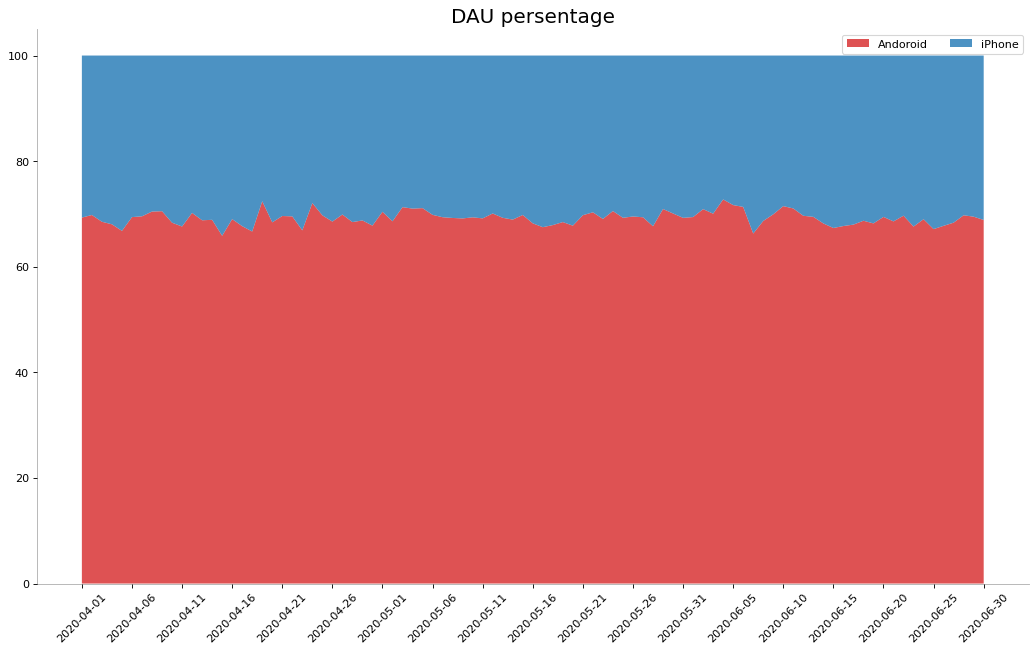

In [71]:
AutomaticBasicDAURaserch("hw_lesson03_dau_device.xlsx")